#  load dataset 

In [385]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import seaborn as sns
import warnings

from sklearn import metrics

warnings.filterwarnings('ignore')

sns.set(rc={'figure.figsize':(7.5,3.8)})
data = pd.read_csv("diabetic_data.csv")

In [386]:
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [387]:
data.shape

(101766, 50)

In [388]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

# preprocessing dataset

In [389]:
data.replace("?",np.nan,inplace = True)
(data.isna().sum()/len(data)*100).sort_values(ascending=False).head(10)

weight               96.858479
medical_specialty    49.082208
payer_code           39.557416
race                  2.233555
diag_3                1.398306
diag_2                0.351787
diag_1                0.020636
encounter_id          0.000000
tolazamide            0.000000
glyburide             0.000000
dtype: float64

In [390]:
data = data.drop('weight',1)
data = data.drop('payer_code', 1)
data = data.drop('medical_specialty',1)
(data.isna().sum()/len(data)*100).sort_values(ascending=False).head(10)

race             2.233555
diag_3           1.398306
diag_2           0.351787
diag_1           0.020636
encounter_id     0.000000
tolazamide       0.000000
glyburide        0.000000
tolbutamide      0.000000
pioglitazone     0.000000
rosiglitazone    0.000000
dtype: float64

In [391]:
print(data['race'].value_counts())

Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64


In [392]:
data['race'] = data['race'].fillna('Caucasian')

In [393]:
data['diag_1'] = data['diag_1'].fillna('Unknown')
data['diag_2'] = data['diag_2'].fillna('Unknown')
data['diag_3'] = data['diag_3'].fillna('Unknown')

In [394]:
data.isna().sum().sort_values(ascending = False).head()

encounter_id     0
tolazamide       0
acetohexamide    0
glipizide        0
glyburide        0
dtype: int64

In [395]:
data.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [396]:
obj_col = data.columns[data.dtypes==object]
print(obj_col,'\n','total number of categorical columns:',len(obj_col))

Index(['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object') 
 total number of categorical columns: 34


In [397]:
num_col = data.columns[data.dtypes==np.int64]
print(num_col,'\n','total number of numerical columns:',len(num_col))

Index(['encounter_id', 'patient_nbr', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses'],
      dtype='object') 
 total number of numerical columns: 13


In [398]:
data['admission_type_id'] = data['admission_type_id'].astype('object')
data['discharge_disposition_id'] = data['discharge_disposition_id'].astype('object')
data['admission_source_id'] = data['admission_source_id'].astype('object')

In [399]:
data = data.drop('encounter_id',1)
data = data.drop('patient_nbr',1)

# Train test split

In [400]:
data1 = data.copy()

In [401]:
from sklearn.model_selection import train_test_split
train_index, test_index = train_test_split(np.array(data1.index),
                                           train_size=0.8,random_state=41)

In [402]:
train = data1.loc[train_index,:]
test = data1.loc[test_index,:]

In [403]:
y_train = train['readmitted']
y_test = test['readmitted']

In [404]:
train.drop('readmitted',axis = 1,inplace = True)
test.drop('readmitted',axis = 1,inplace = True)

In [405]:
train.shape, test.shape

((81412, 44), (20354, 44))

In [406]:
X_train_1 = train.copy()
y_train_1 = y_train.copy()

In [407]:
X_test_1 = test.copy()
y_test_1 = y_test.copy()

# Initial data analysis

<AxesSubplot:xlabel='readmitted', ylabel='count'>

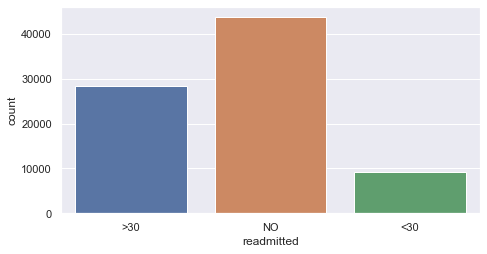

In [408]:
# response
sns.countplot(y_train)

In [409]:
# replace "NO" and "<30" with 0, ">30" with 1
maps={"NO":1,"<30":0,">30":1}
y_train_1 = y_train_1.map(maps)
y_test_1 = y_test_1.map(maps)

[Text(0.5, 1.0, 'after reclassify')]

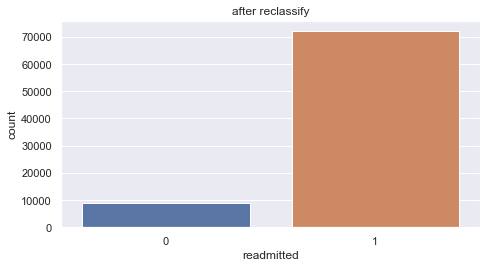

In [410]:
sns.countplot(y_train_1).set(title = 'after reclassify')

### Handling class imbalance

In [411]:
obj_col = X_train_1.columns[X_train_1.dtypes==object]
print(obj_col,'\n','total number of categorical columns:',len(obj_col))

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'diag_1', 'diag_2',
       'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
       'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed'],
      dtype='object') 
 total number of categorical columns: 36


In [412]:
cat_index = list()
for i in obj_col:
    index = X_train_1.columns.get_loc(i)
    cat_index.append(index)
    

In [413]:
len(cat_index)

36

In [414]:
from imblearn.over_sampling import SMOTENC
smnc = SMOTENC(categorical_features=cat_index, random_state=41,sampling_strategy = 0.6)

SMOTE_X, SMOTE_y = smnc.fit_resample(X_train_1, y_train_1)

# Explortary data analysis

In [415]:
SMOTE_y.value_counts()

1    72315
0    43389
Name: readmitted, dtype: int64

<AxesSubplot:xlabel='readmitted', ylabel='count'>

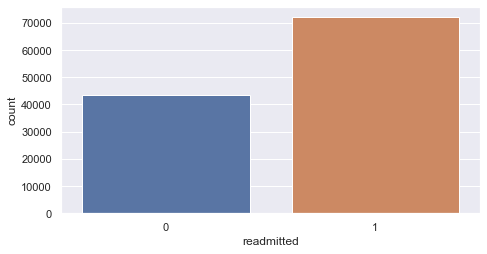

In [416]:
# response
sns.countplot(SMOTE_y)

In [417]:
# categorical data - countplot

# fig,ax = plt.subplots(12,3,figsize=(20,80),dpi=100)
# for i in range(1,37):
#     plt.subplot(12,3,i)
#     sns.countplot(x = SMOTE_X[obj_col[i-1]])

In [418]:
num_col = data.columns[data.dtypes==np.int64]
print(num_col,'\n','total number of numerical columns:',len(num_col))

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'],
      dtype='object') 
 total number of numerical columns: 8


In [419]:
# numerical data - distribution

# fig,ax = plt.subplots(3,3,figsize=(20,20),dpi=100)
# for i in range(1,9):
#     plt.subplot(3,3,i)
#     sns.distplot(SMOTE_X[num_col[i-1]])

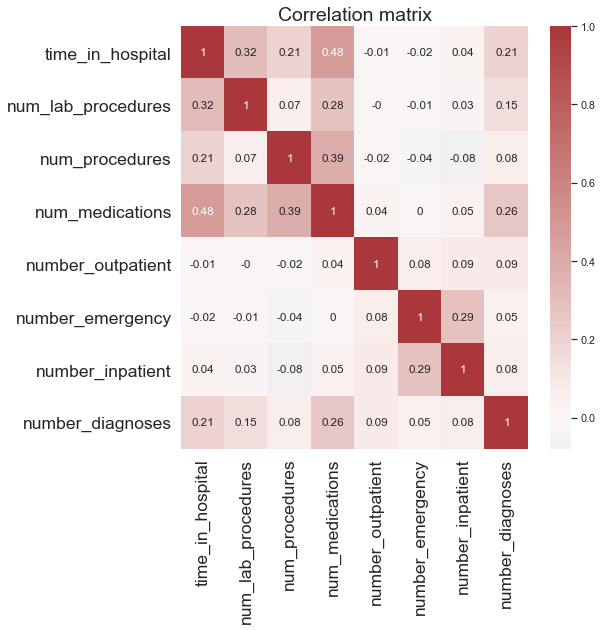

In [420]:
# heat map btw numerical data
plt.figure(figsize=(8,8),dpi = 70)
sns.heatmap(SMOTE_X[num_col].corr().round(2),
            xticklabels=num_col,
            yticklabels=num_col,
            cmap='vlag',center=0,annot=True)
plt.title('Correlation matrix',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18,rotation=360)
plt.show()

sns.pairplot(SMOTE_X[num_col])
plt.show()

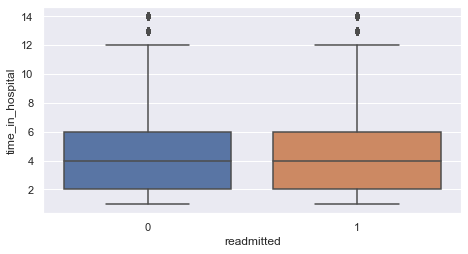

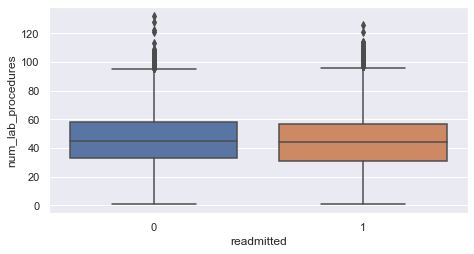

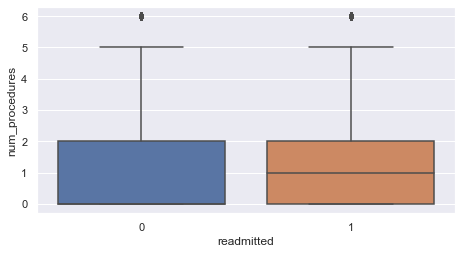

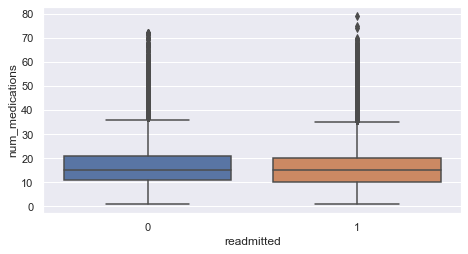

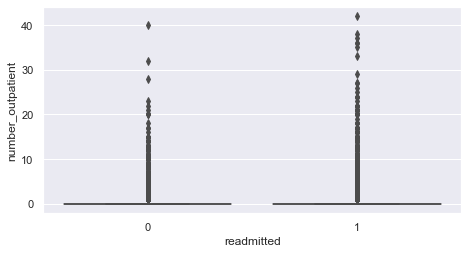

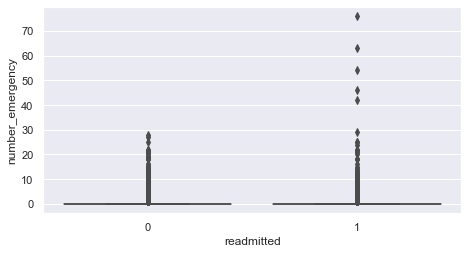

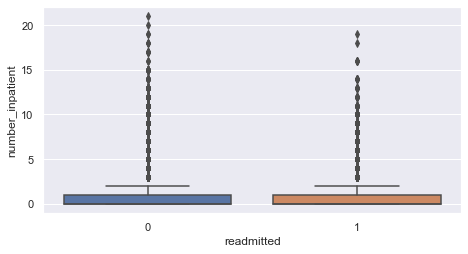

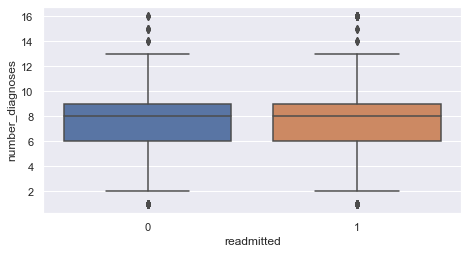

In [421]:
for i in num_col:
    sns.boxplot(x=SMOTE_y, y=SMOTE_X[i])
    plt.show()

In [422]:
# fig,ax = plt.subplots(3,3,figsize=(20,20),dpi=100)
# for i in range(1,9):
#     plt.subplot(3,3,i)
#     sns.distplot(SMOTE_X[num_col[i-1]][SMOTE_y==0],label = 'readmitted = 0')
#     sns.distplot(SMOTE_X[num_col[i-1]][SMOTE_y==1],label = 'readmitted = 1')
#     plt.legend()

In [423]:
# kruskall wallies test for distribution
from scipy import stats

greater = SMOTE_X[SMOTE_y==0]
less = SMOTE_X[SMOTE_y==1]

p_values=[]
stat = []
reject = []
for i in num_col:
    kw = stats.kruskal(greater[i],less[i])
    p_value = kw.pvalue
    p_values.append(p_value)
    statistic = kw.statistic
    stat.append(statistic)
    if p_value<0.01:
        reject.append('Yes')
    else:
        reject.append('No')

In [424]:
pd.DataFrame([stat,p_values,reject],columns = num_col,index = ['statistic','p_value','reject H0?'])

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
statistic,87.392054,89.82192,1042.577893,334.195495,222.61135,7.327345,1493.685466,102.801491
p_value,0.0,0.0,0.0,0.0,0.0,0.006791,0.0,0.0
reject H0?,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [425]:
del SMOTE_X['number_emergency']
del X_test_1['number_emergency']

fig,ax = plt.subplots(12,3,figsize=(20,80),dpi=100)
for i in range(1,37):
    plt.subplot(12,3,i)
    sns.countplot(x = SMOTE_X[obj_col[i-1]], hue = SMOTE_y)
    plt.title(obj_col[i-1])
    plt.legend()

# Feature engineering

In [426]:
SMOTE_X.shape,X_test_1.shape

((115704, 43), (20354, 43))

In [427]:
# concat train_test before feature engineering
train_test = pd.concat([SMOTE_X, X_test_1], axis=0)

#### Transformation on categorical variables

In [428]:
def diag_code(data1, cols):
    for col in cols:
        data1.loc[(data1[col].str.contains("V")) | (data1[col].str.contains("E")), col] = 1000
        data1.loc[(data1[col]=='Unknown'), col] = 0
        data1[col] = data1[col].astype(np.float16)

    for col in cols:
        data1["diag"] = np.nan
        data1.loc[(data1[col]>=390) & (data1[col]<=459) | (data1[col]==785), "diag"] = "Circulatory"
        data1.loc[(data1[col]>=460) & (data1[col]<=519) | (data1[col]==786), "diag"] = "Respiratory"
        data1.loc[(data1[col]>=520) & (data1[col]<=579) | (data1[col]==787), "diag"] = "Digestive"
        data1.loc[(data1[col]>=250) & (data1[col]<251), "diag"] = "Diabetes"
        data1.loc[(data1[col]>=800) & (data1[col]<=999), "diag"] = "Injury"
        data1.loc[(data1[col]>=710) & (data1[col]<=739), "diag"] = "Muscoloskeletal"
        data1.loc[(data1[col]>=580) & (data1[col]<=629) | (data1[col] == 788), "diag"] = "Genitourinary"
        data1.loc[(data1[col]>=140) & (data1[col]<=239), "diag"] = "Neoplasms"
        

        data1["diag"] = data1["diag"].fillna("Other")
        data1[col] = data1["diag"]
        data1 = data1.drop("diag", axis=1)

    return data1

In [429]:
train_test = diag_code(train_test,["diag_1","diag_2","diag_3"])

In [430]:
train_test['diag_1'].value_counts()

Circulatory        43036
Other              23675
Respiratory        18849
Digestive          12397
Diabetes           11422
Injury              9313
Genitourinary       6674
Muscoloskeletal     6368
Neoplasms           4324
Name: diag_1, dtype: int64

In [431]:
train_test['diag_2'].value_counts()

Circulatory        43663
Other              36077
Diabetes           16657
Respiratory        14164
Genitourinary      11462
Digestive           5376
Neoplasms           3397
Injury              3142
Muscoloskeletal     2120
Name: diag_2, dtype: int64

In [432]:
train_test['diag_3'].value_counts()

Circulatory        41140
Other              39359
Diabetes           23316
Respiratory        10185
Genitourinary       9631
Digestive           5059
Neoplasms           2556
Injury              2547
Muscoloskeletal     2265
Name: diag_3, dtype: int64

In [433]:
train_test.admission_type_id.value_counts()

1    78954
3    23222
2    21916
5     5979
6     5631
8      325
7       21
4       10
Name: admission_type_id, dtype: int64

In [434]:
train_test['admission_type_id'].replace(1,'Emergency',inplace = True)
train_test['admission_type_id'].replace(2,'Urgent',inplace = True)
train_test['admission_type_id'].replace(3,'Elective',inplace = True)
train_test['admission_type_id'].replace(4,'Newborn',inplace = True)
train_test['admission_type_id'].replace(5,'Not Available',inplace = True)
train_test['admission_type_id'].replace(6,'NULL',inplace = True)
train_test['admission_type_id'].replace(7,'Trauma Center',inplace = True)
train_test['admission_type_id'].replace(8,'Not Mapped',inplace = True)

In [435]:
train_test.admission_type_id.value_counts()

Emergency        78954
Elective         23222
Urgent           21916
Not Available     5979
NULL              5631
Not Mapped         325
Trauma Center       21
Newborn             10
Name: admission_type_id, dtype: int64

In [436]:
# reference: https://www.hcup-us.ahrq.gov/db/vars/siddistnote.jsp?var=asource
# (17,20 - since no resources identifies code 17 and 20, they are considered as 'other')
train_test['admission_source_id'].replace(1, 'Referral', inplace=True)
train_test['admission_source_id'].replace(2, 'Referral', inplace=True)
train_test['admission_source_id'].replace(3, 'Referral', inplace=True)
train_test['admission_source_id'].replace(4, 'Transfer', inplace=True)
train_test['admission_source_id'].replace(5, 'Transfer', inplace=True)
train_test['admission_source_id'].replace(6, 'Transfer', inplace=True)
train_test['admission_source_id'].replace(7, 'Emergency room', inplace=True)
train_test['admission_source_id'].replace(8, 'Court/Law enforcement', inplace=True)
train_test['admission_source_id'].replace(9, 'Unknown', inplace=True)
train_test['admission_source_id'].replace(10, 'Transfer', inplace=True)
train_test['admission_source_id'].replace(11, 'delivery', inplace=True)
train_test['admission_source_id'].replace(13, 'delivery', inplace=True)
train_test['admission_source_id'].replace(14, 'delivery', inplace=True)
train_test['admission_source_id'].replace(17, 'Unknown', inplace=True)
train_test['admission_source_id'].replace(20, 'Unknown', inplace=True)
train_test['admission_source_id'].replace(22, 'Transfer', inplace=True)
train_test['admission_source_id'].replace(25, 'Transfer', inplace=True)

In [437]:
train_test['admission_source_id'].value_counts()

Emergency room           82673
Referral                 38280
Unknown                   8473
Transfer                  6611
Court/Law enforcement       16
delivery                     5
Name: admission_source_id, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Emergency room'),
  Text(1, 0, 'Referral'),
  Text(2, 0, 'Transfer'),
  Text(3, 0, 'Unknown'),
  Text(4, 0, 'Court/Law enforcement'),
  Text(5, 0, 'delivery')])

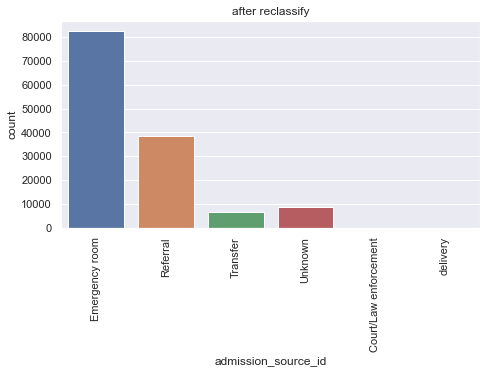

In [438]:
sns.countplot('admission_source_id', data=train_test).set(title = 'after reclassify')
plt.xticks(rotation=90)

In [439]:
# 17-19 no resouces for code 17-19. replaced by unknown
# reference: https://www.hcup-us.ahrq.gov/db/vars/siddistnote.jsp?var=dispuniform
train_test['discharge_disposition_id'].replace(1, 'Routine', inplace = True)
train_test['discharge_disposition_id'].replace(2, 'Transfer_stHospital', inplace = True)
train_test['discharge_disposition_id'].replace(3, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(4, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(5, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(6, 'HHC', inplace = True)
train_test['discharge_disposition_id'].replace(7, 'AMA', inplace = True)
train_test['discharge_disposition_id'].replace(8, 'HHC', inplace = True)
train_test['discharge_disposition_id'].replace(9, 'Transfer_stHospital', inplace = True)
train_test['discharge_disposition_id'].replace(10, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(11, 'Expired', inplace = True)
train_test['discharge_disposition_id'].replace(12, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(13, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(14, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(15, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(16, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(17, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(18, 'NULL', inplace = True)
train_test['discharge_disposition_id'].replace(19, 'Expired', inplace = True)
train_test['discharge_disposition_id'].replace(20, 'Expired', inplace = True)
train_test['discharge_disposition_id'].replace(22, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(23, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(24, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(25, 'Not mapped', inplace = True)
train_test['discharge_disposition_id'].replace(27, 'Transfer_Other', inplace = True)
train_test['discharge_disposition_id'].replace(28, 'Transfer_Other', inplace = True)

In [440]:
train_test['discharge_disposition_id'].value_counts()

Routine                82921
Transfer_Other         26757
HHC                    16561
NULL                    4168
Transfer_stHospital     2333
Expired                 1652
Not mapped              1027
AMA                      639
Name: discharge_disposition_id, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Routine'),
  Text(1, 0, 'Transfer_Other'),
  Text(2, 0, 'Expired'),
  Text(3, 0, 'HHC'),
  Text(4, 0, 'NULL'),
  Text(5, 0, 'Transfer_stHospital'),
  Text(6, 0, 'AMA'),
  Text(7, 0, 'Not mapped')])

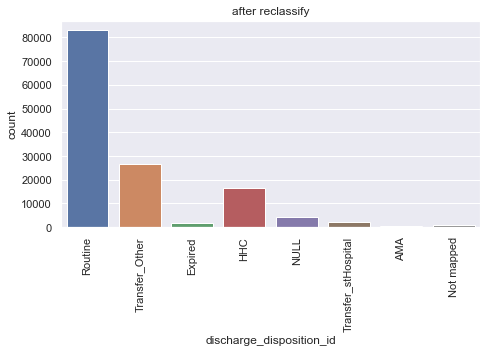

In [441]:
sns.countplot('discharge_disposition_id', data=train_test).set(title = 'after reclassify')
plt.xticks(rotation=90)

In [442]:
obj_col

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'diag_1', 'diag_2',
       'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
       'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed'],
      dtype='object')

In [443]:
medications = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 
               'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 
               'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 
               'miglitol', 'troglitazone', 'tolazamide', 'examide', 
               'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 
               'metformin-rosiglitazone', 'metformin-pioglitazone', 'citoglipton']

In [444]:
def use_or_not(data, col):
    maps = {'No': 0, 'Up': 1, 'Steady': 1, 'Down': 1}
    data['use_or_not'+col] = data[col].map(maps)

In [445]:
for i in medications:
    use_or_not(train_test,i)

In [446]:
medications_use_ornot=['use_or_not' + i for i in medications]

In [447]:
## new variable: the number of doses the patient take 
train_test ['number_24medications'] = np.zeros(train_test.shape[0])
for i in medications_use_ornot:
    train_test ['number_24medications'] = train_test['number_24medications'] + train_test[i]

In [448]:
for i in medications_use_ornot:
    del train_test[i]

In [449]:
def change_or_not(data,col):
    maps = {'No': 0, 'Up': 1, 'Steady': 0, 'Down': 1}
    data['change_or_not'+col] = data[col].map(maps)

In [450]:
for i in medications:
    change_or_not(train_test,i)

In [451]:
medications_change_or_not=['change_or_not' + i for i in medications]

In [452]:
## new variable: the number of changes of doses the patient take 
train_test ['number_change_24medications'] = np.zeros(train_test.shape[0])
for i in medications_change_or_not:
    train_test ['number_change_24medications'] = train_test['number_change_24medications'] + train_test[i]

In [453]:
for i in medications_change_or_not:
    del train_test[i]

In [454]:
for i in medications:
    del train_test[i]

In [455]:
num_col = train_test.columns[train_test.dtypes!=object]
print(num_col,'\n','total number of numerical columns:',len(num_col))

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_inpatient',
       'number_diagnoses', 'number_24medications',
       'number_change_24medications'],
      dtype='object') 
 total number of numerical columns: 9


In [456]:
obj_col = train_test.columns[train_test.dtypes==object]
print(obj_col,'\n','total number of categorical columns:',len(obj_col))

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'diag_1', 'diag_2',
       'diag_3', 'max_glu_serum', 'A1Cresult', 'change', 'diabetesMed'],
      dtype='object') 
 total number of categorical columns: 13


In [457]:
for i in obj_col:
    display(train_test[i].value_counts())

Caucasian          110365
AfricanAmerican     21476
Hispanic             2064
Other                1510
Asian                 643
Name: race, dtype: int64

Female             74516
Male               61539
Unknown/Invalid        3
Name: gender, dtype: int64

[70-80)     38299
[60-70)     30661
[80-90)     23838
[50-60)     21351
[40-50)     11605
[30-40)      4240
[90-100)     3085
[20-30)      2070
[10-20)       746
[0-10)        163
Name: age, dtype: int64

Emergency        78954
Elective         23222
Urgent           21916
Not Available     5979
NULL              5631
Not Mapped         325
Trauma Center       21
Newborn             10
Name: admission_type_id, dtype: int64

Routine                82921
Transfer_Other         26757
HHC                    16561
NULL                    4168
Transfer_stHospital     2333
Expired                 1652
Not mapped              1027
AMA                      639
Name: discharge_disposition_id, dtype: int64

Emergency room           82673
Referral                 38280
Unknown                   8473
Transfer                  6611
Court/Law enforcement       16
delivery                     5
Name: admission_source_id, dtype: int64

Circulatory        43036
Other              23675
Respiratory        18849
Digestive          12397
Diabetes           11422
Injury              9313
Genitourinary       6674
Muscoloskeletal     6368
Neoplasms           4324
Name: diag_1, dtype: int64

Circulatory        43663
Other              36077
Diabetes           16657
Respiratory        14164
Genitourinary      11462
Digestive           5376
Neoplasms           3397
Injury              3142
Muscoloskeletal     2120
Name: diag_2, dtype: int64

Circulatory        41140
Other              39359
Diabetes           23316
Respiratory        10185
Genitourinary       9631
Digestive           5059
Neoplasms           2556
Injury              2547
Muscoloskeletal     2265
Name: diag_3, dtype: int64

None    129828
Norm      3099
>200      1778
>300      1353
Name: max_glu_serum, dtype: int64

None    118300
>8        8731
Norm      5112
>7        3915
Name: A1Cresult, dtype: int64

No    73953
Ch    62105
Name: change, dtype: int64

Yes    107407
No      28651
Name: diabetesMed, dtype: int64

In [458]:
train_test_new=pd.get_dummies(train_test).copy()

In [459]:
X_train_2 = train_test_new.iloc[:SMOTE_X.shape[0],:]
X_test_2 = train_test_new.iloc[SMOTE_X.shape[0]:,:]
X_train_2.shape, SMOTE_X.shape, X_test_2.shape, X_test_1.shape

((115704, 88), (115704, 43), (20354, 88), (20354, 43))

#### Transformation on numerical variables

In [460]:
num_col

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_inpatient',
       'number_diagnoses', 'number_24medications',
       'number_change_24medications'],
      dtype='object')

In [461]:
X_train_2[num_col].skew()

time_in_hospital               1.109383
num_lab_procedures            -0.258511
num_procedures                 1.436819
num_medications                1.289756
number_outpatient              8.659235
number_inpatient               3.563036
number_diagnoses              -0.932636
number_24medications           0.841894
number_change_24medications    1.448276
dtype: float64

In [462]:
right_skewed = num_col[X_train_2[num_col].skew()>0]
right_skewed

Index(['time_in_hospital', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_inpatient', 'number_24medications',
       'number_change_24medications'],
      dtype='object')

In [463]:
def boxcox(column, data):
    if data[column].min()==0:
        data[column]=data[column]+1
    data['bc_'+column]=stats.boxcox(data[column])[0]

In [464]:
for i in right_skewed:
    boxcox(i, X_train_2)

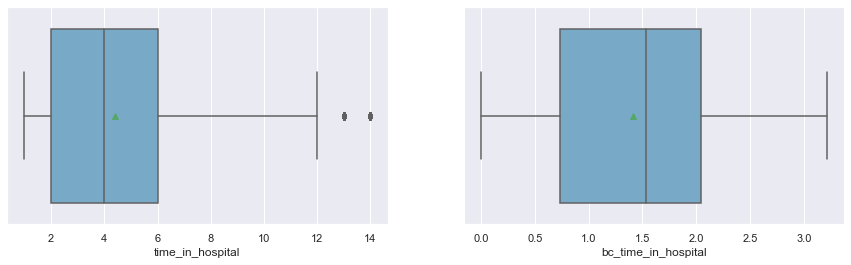

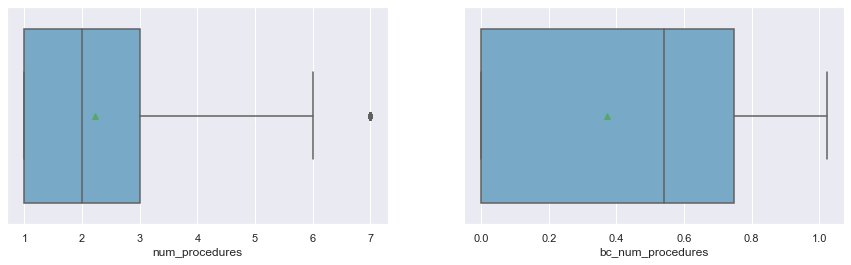

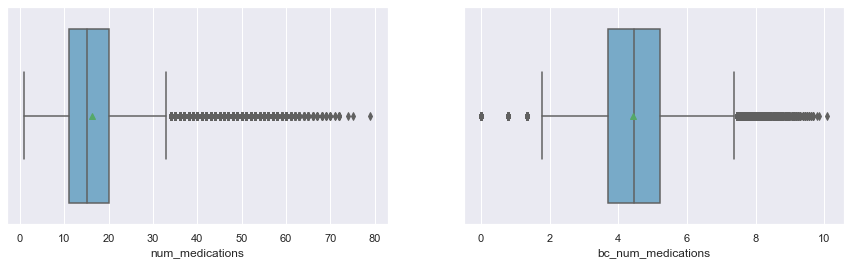

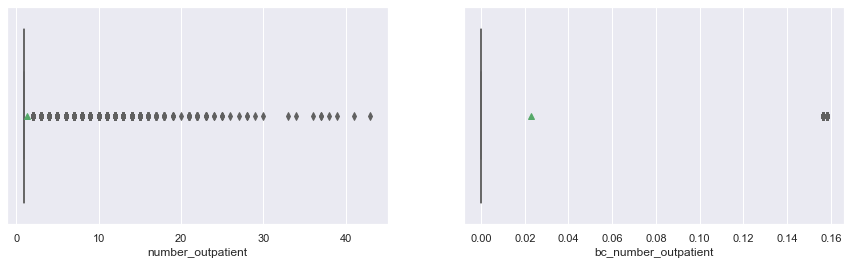

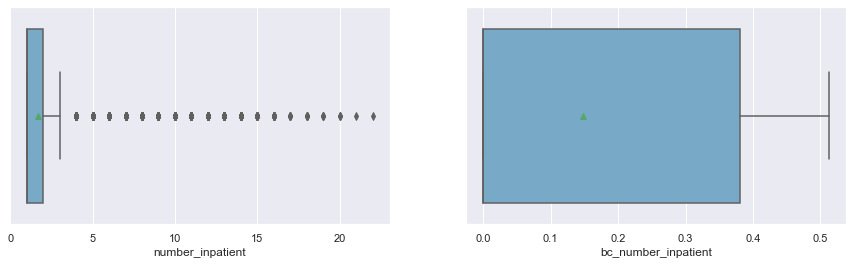

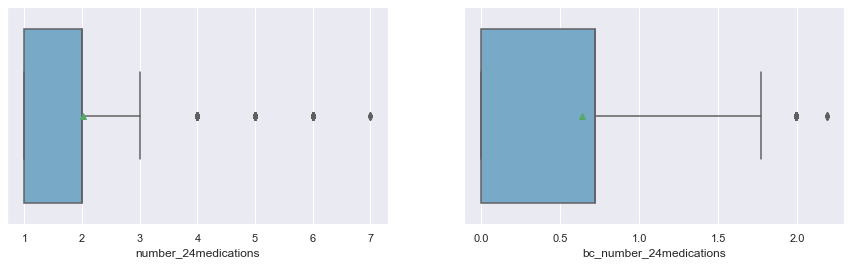

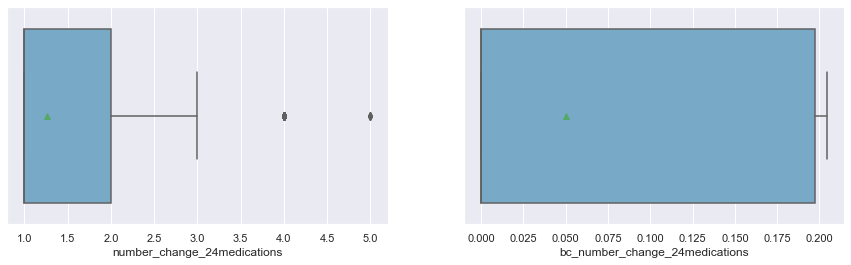

In [465]:
for i in right_skewed:
    fig, axes = plt.subplots(1,2,figsize = (15,4))
  
    sns.boxplot(i, data=X_train_2, palette='Blues', showmeans=True,ax=axes[0])
     
    sns.boxplot('bc_'+i, data=X_train_2, palette='Blues', showmeans=True,ax=axes[1])

In [466]:
len(X_train_2[X_train_2['bc_number_change_24medications']>0.175])

29528

In [467]:
def skewness_compare(data,col):
    print(col+':',data[col].skew(),'bc_'+col+':',data['bc_'+col].skew())
    

In [468]:
for i in right_skewed:
    skewness_compare(X_train_2,i)

time_in_hospital: 1.10938339495141 bc_time_in_hospital: -0.02516108308451716
num_procedures: 1.436818989167291 bc_num_procedures: 0.2646163343424894
num_medications: 1.2897556557478171 bc_num_medications: 0.03015451303600017
number_outpatient: 8.659234988841346 bc_number_outpatient: 2.0016235925593424
number_inpatient: 3.563036432867576 bc_number_inpatient: 0.6891365174248685
number_24medications: 0.8418942589979634 bc_number_24medications: -0.013791798239415997
number_change_24medications: 1.4482757168203924 bc_number_change_24medications: 1.1231611966225108


In [469]:
for i in right_skewed:
    boxcox(i, X_test_2)

In [470]:
for i in right_skewed:
    del X_train_2[i]
    del X_test_2[i]

In [471]:
for i in X_train_2.columns:
    if len(X_train_2[i].unique())==1:
        print(i)
        del X_train_2[i]
        del X_test_2[i]

In [472]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train_2)

# normalize
X_train_3  = scaler.transform(X_train_2)
X_test_3 = scaler.transform(X_test_2)

In [473]:
X_train_3.shape,X_test_3.shape

((115704, 88), (20354, 88))

In [474]:
### normalize+remove low-variance features
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.985 * (1 - .985)))
sel.fit(X_train_3)
X_train_4 = sel.transform(X_train_3)
X_test_4 = sel.transform(X_test_3)

In [475]:
X_train_4.shape,X_test_4.shape

((115704, 71), (20354, 71))

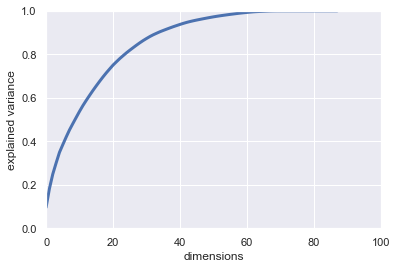

In [476]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train_3)
cumsum = np.cumsum(pca.explained_variance_ratio_)
# Plot the explained variance vs number of dimensions
plt.figure(figsize = (6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 100, 0, 1])
plt.xlabel("dimensions")
plt.ylabel("explained variance")
plt.grid(True)
plt.show()

In [477]:
# pca after normalize
pca = PCA(n_components=0.95).fit(X_train_3)

X_train_pca = pca.transform(X_train_3)
X_test_pca = pca.transform(X_test_3)

In [478]:
X_train_pca.shape,X_test_pca.shape

((115704, 44), (20354, 44))

In [479]:
X_train_pca = pd.DataFrame(X_train_pca)

<AxesSubplot:xlabel='0', ylabel='1'>

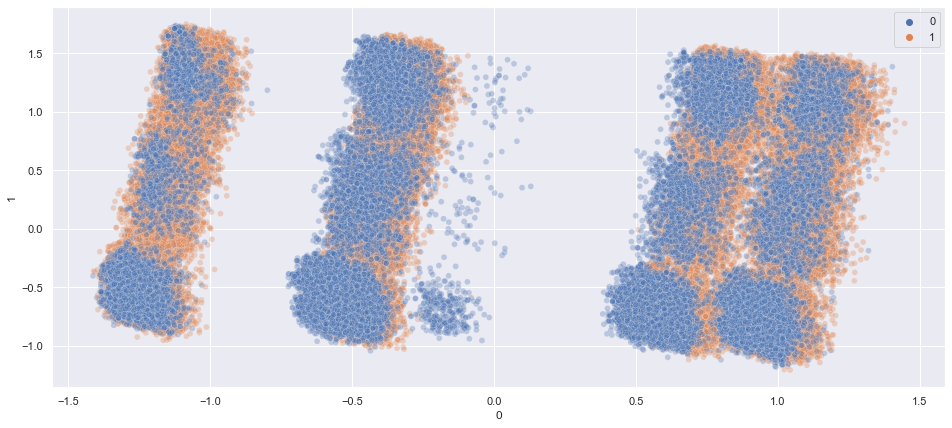

In [480]:
plt.figure(figsize=(16,7))
plt.subplot()
sns.scatterplot(
    x=X_train_pca[0], y=X_train_pca[1],
    alpha=0.3,hue = np.ravel(SMOTE_y)
)

In [481]:
# forward selection based on balanced accuracy
from sklearn.feature_selection import SequentialFeatureSelector
def forward_select(X,Y,clf,n_features_to_select):
    sfs_forward = SequentialFeatureSelector(clf, n_features_to_select=n_features_to_select,
                                        direction='forward',cv = 2, scoring='balanced_accuracy').fit(X,Y)
    columns_select = X_train_2.columns[sfs_forward.get_support()]
    print('columns selected: \n', columns_select)
    transformed_Xtrain = sfs_forward.transform(X_train_3)
    transformed_Xtest = sfs_forward.transform(X_test_3)
    return transformed_Xtrain,transformed_Xtest

In [482]:
rocDict = {}
score_name = ['acc', 'pre', 'rec', 'F1', 'bal_acc']

# Logit regression

In [483]:
def lr(X_train, y_train, X_test, y_test):
    clf = LogisticRegression(random_state=41,penalty='l1',solver='saga').fit(X_train, y_train)
    clf_train_acc = clf.score(X_train, y_train).round(4)
    clf_test_acc = clf.score(X_test, y_test).round(4)
    y_pred = clf.predict(X_test)
    clf_test_precision = metrics.precision_score(y_test, y_pred).round(4)
    clf_test_recall = metrics.recall_score(y_test, y_pred).round(4)
    clf_test_F1 = metrics.f1_score(y_test, y_pred).round(4)
    clf_test_bal_acc = metrics.balanced_accuracy_score(y_test, y_pred).round(4)

    pred = clf.predict_proba(X_test)[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, pred)
    roc_auc = metrics.auc(fpr, tpr)

    scores = {'acc': clf_test_acc,\
                'pre': clf_test_precision,\
                'rec': clf_test_recall,\
                'F1': clf_test_F1,\
                'bal_acc': clf_test_bal_acc,\
                'fpr': fpr,\
                'tpr': tpr,\
                'roc_auc': roc_auc}
    
    return scores

In [484]:
### normalize only
from sklearn.linear_model import LogisticRegression

lr_3_scores = lr(X_train_3,SMOTE_y,X_test_3,y_test_1)
print('test scores: ', end=' ')
for name in score_name:
    print('{}'.format(lr_3_scores[name]), end=' ')

rocDict.update({'LR_1': \
                {'fpr': lr_3_scores['fpr'],\
                    'tpr': lr_3_scores['tpr'],\
                    'roc_auc': lr_3_scores['roc_auc']}\
                })

test scores:  0.8481 0.8924 0.9428 0.9169 0.5165 

In [485]:
### normalize+remove low-variance features
lr_4_scores = lr(X_train_4,SMOTE_y,X_test_4,y_test_1)
print('test scores: ', end=' ')
for name in score_name:
    print('{}'.format(lr_4_scores[name]), end=' ')

rocDict.update({'LR_2': \
                {'fpr': lr_3_scores['fpr'],\
                    'tpr': lr_3_scores['tpr'],\
                    'roc_auc': lr_3_scores['roc_auc']}\
                })

test scores:  0.8498 0.8927 0.9446 0.9179 0.5176 

In [486]:
# pca after normalize
lr_pca_scores = lr(X_train_pca,SMOTE_y,X_test_pca,y_test_1)
print('test scores: ', end=' ')
for name in score_name:
    print('{}'.format(lr_pca_scores[name]), end=' ')

rocDict.update({'LR_3': \
                {'fpr': lr_3_scores['fpr'],\
                    'tpr': lr_3_scores['tpr'],\
                    'roc_auc': lr_3_scores['roc_auc']}\
                })

test scores:  0.7739 0.8946 0.8452 0.8692 0.5239 

In [487]:
lr_acc = [lr_3_scores['acc'],lr_4_scores['acc'],lr_pca_scores['acc']]
lr_pre = [lr_3_scores['pre'],lr_4_scores['pre'],lr_pca_scores['pre']]
lr_rec = [lr_3_scores['rec'],lr_4_scores['rec'],lr_pca_scores['rec']]
lr_f1 = [lr_3_scores['F1'],lr_4_scores['F1'],lr_pca_scores['F1']]
lr_bal_acc = [lr_3_scores['bal_acc'],lr_4_scores['bal_acc'],lr_pca_scores['bal_acc']]

In [488]:
clf = LogisticRegression(random_state=41,penalty='l1',solver='saga').fit(X_train_3, SMOTE_y)


<AxesSubplot:xlabel='abs_coef'>

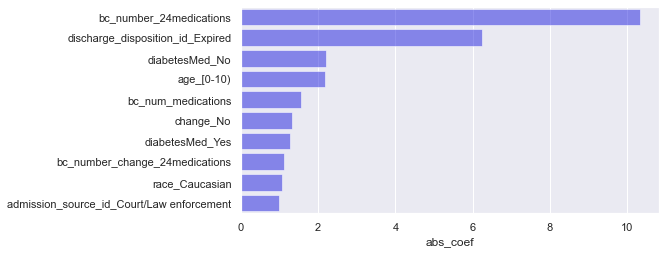

In [489]:
coef = pd.DataFrame(clf.coef_.T,index = X_train_2.columns, columns=['coef'])
coef['abs_coef'] = np.abs(coef['coef'])
sns.barplot(x=coef.sort_values('abs_coef',ascending=False)['abs_coef'][:10],
           y = coef.sort_values('abs_coef',ascending=False)['abs_coef'][:10].index,color='Blue',alpha = 0.5)

In [490]:
# forward selection
# n_features = [10,15,20,30,40]
# precision = []
# recall = []
# f1 = []
# bal_acc = []
# lr = LogisticRegression(random_state=41,penalty='l1',solver='saga')
# for i in  n_features:
#     print('number of columns =  ', str(i))
#     new_X_train,new_X_test = forward_select(X_train_3, SMOTE_y,lr,i)
#     forward_clf = lr.fit(new_X_train, SMOTE_y)
#     y_pred = forward_clf.predict(new_X_test)
#     clf_test_precision = metrics.precision_score(y_test_1, y_pred).round(4)
#     clf_test_recall = metrics.recall_score(y_test_1, y_pred).round(4)
#     clf_test_F1 = metrics.f1_score(y_test_1, y_pred).round(4)
#     clf_test_bal_acc = metrics.balanced_accuracy_score(y_test_1, y_pred).round(4)
#     precision.append(clf_test_precision)
#     recall.append(clf_test_recall)
#     f1.append(clf_test_F1)
#     bal_acc.append(clf_test_bal_acc)
#     print('balanced accuracy:',clf_test_bal_acc)
#     print('-------------------------')

In [491]:
#best_bal_acc =max(bal_acc)
#print('the best balanced accuracy for naive bayes is: ',best_bal_acc)

In [492]:
# best_index = bal_acc.index(best_bal_acc)
# selected_lr_bal_acc = bal_acc[best_index]
# selected_lr_recall = recall[best_index]
# selected_lr_precision = precision[best_index]
# selected_lr_f1 = f1[best_index]

In [493]:
#selected_lr_precision,selected_lr_recall,selected_lr_f1

In [494]:
logit_forward = [0.8932, 0.9658, 0.9281,0.5205]

In [593]:
# stepwise feature selection

# from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# from sklearn.metrics import make_scorer, balanced_accuracy_score
# bal_acc = make_scorer(balanced_accuracy_score)
# sffs = SFS(LogisticRegression(random_state=41,penalty='l1',solver='saga'),
#          k_features=(1,10),
#          forward=True,
#          floating=True,
#          scoring=bal_acc,
#          cv=5)
# sffs.fit(X_train_4, SMOTE_y)
# sffs.k_feature_names_
#('3', '13', '16', '23', '26', '58', '60', '62', '69', '70')

('3', '13', '16', '23', '26', '58', '60', '62', '69', '70')

In [594]:
# reduced_train = sffs.transform(X_train_4)
# reduced_test = sffs.transform(X_test_4)

# clf = LogisticRegression(random_state=41,penalty='l1',solver='saga')
# clf.fit(reduced_train, SMOTE_y)
# y_predicted = clf.predict(reduced_test)


# precision = metrics.precision_score(y_test_1, y_predicted)
# print(round(precision,4))
# recall = metrics.recall_score(y_test_1, y_predicted)
# print(round(recall,4))
# f1 = metrics.f1_score(y_test_1, y_predicted)
# print(round(f1,4))
# bal_acc = metrics.balanced_accuracy_score(y_test_1, y_predicted)
# print(round(bal_acc,4))

0.8927
0.9207
0.9065
0.5172


In [497]:
logit_forward = [0.8927, 0.9207, 0.9065, 0.5172]

# Random Forest

In [498]:
from sklearn.ensemble import  RandomForestClassifier

In [499]:
# tuning_parameters = {
#     'min_samples_leaf': np.arange(1, X_train_4.shape[1], 20),
#     'max_depth': np.arange(1, X_train_4.shape[1], 20),
#     'min_samples_split': np.arange(2, X_train_4.shape[1], 20)
# }
# 
# test_accuracy=[]
# 
# for i in tuning_parameters['min_samples_leaf']:
#     test_acc = []
#     for j in tuning_parameters['max_depth']:
#         for k in tuning_parameters['min_samples_split']:
#             model = RandomForestClassifier(n_estimators = 100,min_samples_leaf=i,max_depth=j,
#                                            min_samples_split=k, random_state = 41)
#             model.fit(X_train_4, SMOTE_y)
#             test = model.score(X_test_4, y_test_1).round(4)
#             test_acc.append(test)
#     test_accuracy.append(test_acc)
#     print('test accuracy for min_samples_leaf = '+str(i),'\n',test_acc)

In [500]:
#min_samples_leaf = np.arange(1, X_train_4.shape[1], 20)
#max_depth = np.arange(1, X_train_4.shape[1], 20)
#min_samples_split = np.arange(2, X_train_4.shape[1], 20)

In [501]:
#test_balaccuracy = parameter_tuning(min_samples_leaf, max_depth, min_samples_split,X_train_3,SMOTE_y,X_test_3,y_test_1)

In [502]:
#index = []
#for i in range(len(min_samples_leaf)):
#    for j in range(len(max_depth)):
#        for k in range(len(min_samples_split)):
#            index.append([i,j,k])

In [503]:
#best_ind = index[test_balaccuracy.index(max(test_balaccuracy))]
#best_min_samples_leaf = min_samples_leaf[best_ind[0]]
#best_max_depth = max_depth[best_ind[1]]
#best_min_samples_split = min_samples_split[best_ind[2]]
#best_min_samples_leaf,best_max_depth,best_min_samples_split

In [504]:
def rf(X_train, y_train, X_test, y_test):
    clf = RandomForestClassifier(n_estimators = 100,min_samples_leaf=41,
                                 max_depth=41, min_samples_split = 2,random_state = 41).fit(X_train, y_train).fit(X_train, y_train)
    clf_test_acc = clf.score(X_test, y_test).round(4)
    y_pred = clf.predict(X_test)
    clf_test_precision = metrics.precision_score(y_test, y_pred).round(4)
    clf_test_recall = metrics.recall_score(y_test, y_pred).round(4)
    clf_test_F1 = metrics.f1_score(y_test, y_pred).round(4)
    clf_test_bal_acc = metrics.balanced_accuracy_score(y_test, y_pred).round(4)

    pred = clf.predict_proba(X_test)[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, pred)
    roc_auc = metrics.auc(fpr, tpr)

    scores = {'acc': clf_test_acc,\
                'pre': clf_test_precision,\
                'rec': clf_test_recall,\
                'F1': clf_test_F1,\
                'bal_acc': clf_test_bal_acc,\
                'fpr': fpr,\
                'tpr': tpr,\
                'roc_auc': roc_auc}
    
    return scores

In [505]:
### normalize only
rf_3_scores = rf(X_train_3,SMOTE_y,X_test_3,y_test_1)
print('test scores: ', end=' ')
for name in score_name:
    print('{}'.format(rf_3_scores[name]), end=' ')

rocDict.update({'RF_1': \
                {'fpr': rf_3_scores['fpr'],\
                    'tpr': rf_3_scores['tpr'],\
                    'roc_auc': rf_3_scores['roc_auc']}\
                })

test scores:  0.8472 0.8912 0.9432 0.9165 0.5108 

In [506]:
### normalize+remove low-variance features
rf_4_scores = rf(X_train_4,SMOTE_y,X_test_4,y_test_1)
print('test scores: ', end=' ')
for name in score_name:
    print('{}'.format(rf_4_scores[name]), end=' ')

rocDict.update({'RF_2': \
                {'fpr': rf_4_scores['fpr'],\
                    'tpr': rf_4_scores['tpr'],\
                    'roc_auc': rf_4_scores['roc_auc']}\
                })

test scores:  0.8463 0.8906 0.9429 0.916 0.508 

In [507]:
# pca after normalize
rf_pca_scores = rf(X_train_pca,SMOTE_y,X_test_pca,y_test_1)
print('test scores:',rf_pca_scores)

test scores: {'acc': 0.8213, 'pre': 0.8922, 'rec': 0.9088, 'F1': 0.9004, 'bal_acc': 0.5148, 'fpr': array([0.        , 0.        , 0.        , ..., 0.99955752, 1.        ,
       1.        ]), 'tpr': array([0.00000000e+00, 5.52669393e-05, 1.98960982e-03, ...,
       9.99834199e-01, 9.99834199e-01, 1.00000000e+00]), 'roc_auc': 0.567829481439601}


In [508]:
rf_acc = [rf_3_scores['acc'],rf_4_scores['acc'],rf_pca_scores['acc']]
rf_pre = [rf_3_scores['pre'],rf_4_scores['pre'],rf_pca_scores['pre']]
rf_rec = [rf_3_scores['rec'],rf_4_scores['rec'],rf_pca_scores['rec']]
rf_f1 = [rf_3_scores['F1'],rf_4_scores['F1'],rf_pca_scores['F1']]
rf_bal_acc = [rf_3_scores['bal_acc'],rf_4_scores['bal_acc'],rf_pca_scores['bal_acc']]

In [509]:
rf = RandomForestClassifier(n_estimators = 100,min_samples_leaf=1,
                                 max_depth=1, random_state = 41).fit(X_train_3, SMOTE_y)

In [510]:
rf_importance = pd.DataFrame(rf.feature_importances_.T, index = X_train_2.columns, columns=['importance'])

<AxesSubplot:xlabel='importance'>

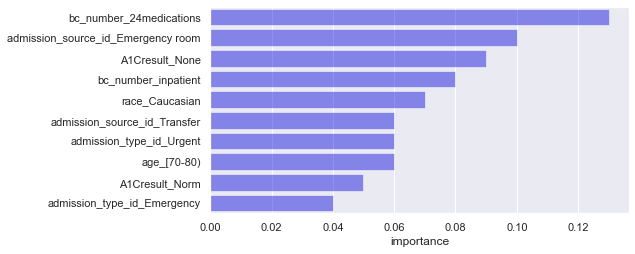

In [511]:
rf_importance = pd.DataFrame(rf.feature_importances_.T, index = X_train_2.columns, columns=['importance'])
sns.barplot(x=rf_importance.sort_values('importance',ascending=False)['importance'][:10],
           y = rf_importance.sort_values('importance',ascending=False)['importance'][:10].index,color='Blue',alpha = 0.5)

In [512]:
# forward selection
# n_features = [10,15,20,30]
# precision = []
# recall = []
# f1 = []
# bal_acc = []
# rf = RandomForestClassifier(n_estimators = 100,min_samples_leaf=41,
#                                  max_depth=41, min_samples_split = 2,random_state = 41)
# for i in  n_features:
#     print('number of columns =  ', str(i))
#     new_X_train,new_X_test = forward_select(X_train_3, SMOTE_y,rf,i)
#     forward_clf = rf.fit(new_X_train, SMOTE_y)
#     y_pred = forward_clf.predict(new_X_test)
#     clf_test_precision = metrics.precision_score(y_test_1, y_pred).round(4)
#     clf_test_recall = metrics.recall_score(y_test_1, y_pred).round(4)
#     clf_test_F1 = metrics.f1_score(y_test_1, y_pred).round(4)
#     clf_test_bal_acc = metrics.balanced_accuracy_score(y_test_1, y_pred).round(4)
#     precision.append(clf_test_precision)
#     recall.append(clf_test_recall)
#     f1.append(clf_test_F1)
#     bal_acc.append(clf_test_bal_acc)
#     print('balanced accuracy:',clf_test_bal_acc)
#     print('-------------------------')

In [513]:
# best_bal_acc =max(bal_acc)
# print('the best balanced accuracy for naive bayes is: ',best_bal_acc)

In [514]:
# best_index = bal_acc.index(best_bal_acc)
# selected_rf_bal_acc = bal_acc[best_index]
# selected_rf_recall = recall[best_index]
# selected_rf_precision = precision[best_index]
# selected_rf_f1 = f1[best_index]

In [515]:
# selected_rf_precision,selected_rf_recall,selected_rf_f1

In [516]:
rf_forward = [0.8918, 0.9043, 0.898,0.5128]

# Naive Bayes

In [517]:
from sklearn import naive_bayes

def passNB(X_train, y_train, X_test, y_test):
    nb = naive_bayes.MultinomialNB(alpha=1, fit_prior=True, class_prior=None).fit(X_train, y_train)
    
    acc_train = nb.score(X_train, y_train)
    acc_test = nb.score(X_test, y_test).round(4)
    y_pred = nb.predict(X_test)
    precision_test = metrics.precision_score(y_test, y_pred).round(4)
    recall_test = metrics.recall_score(y_test, y_pred).round(4)
    F1_test = metrics.f1_score(y_test, y_pred).round(4)
    test_bal_acc = metrics.balanced_accuracy_score(y_test, y_pred).round(4)
    print('training accuracy: ', acc_train.round(4))
    scores = [acc_test, precision_test, recall_test, F1_test, test_bal_acc]
    return scores

# normalize only
nb_3_scores = passNB(X_train_3, SMOTE_y, X_test_3, y_test_1)
print('test scores:',nb_3_scores)

# normalize+remove low-variance features
nb_4_scores = passNB(X_train_4, SMOTE_y, X_test_4, y_test_1)
print('test scores:',nb_4_scores)

# pca after normalize, then nomolized to fit Multinomial NB
# Otherwise will get "ValueError: Negative values in data passed to MultinomialNB (input X)"
nb_pca_scores = passNB(MinMaxScaler().fit_transform(X_train_pca), SMOTE_y, MinMaxScaler().fit_transform(X_test_pca), y_test_1)
print('test scores:',nb_pca_scores)

nb_acc = []
nb_pre = []
nb_rec = []
nb_f1 = []
nb_bal_acc = []

nb_scores = [nb_acc, nb_pre, nb_rec, nb_f1, nb_bal_acc]

for scoreRow in nb_scores:
    scoreRow.append(nb_3_scores[nb_scores.index(scoreRow)])
    scoreRow.append(nb_4_scores[nb_scores.index(scoreRow)])
    scoreRow.append(nb_pca_scores[nb_scores.index(scoreRow)])
    print(scoreRow)


training accuracy:  0.6941
test scores: [0.7384, 0.8953, 0.7992, 0.8445, 0.5253]
training accuracy:  0.6865
test scores: [0.742, 0.8938, 0.8054, 0.8473, 0.5197]
training accuracy:  0.625
test scores: [0.889, 0.889, 1.0, 0.9412, 0.5]
[0.7384, 0.742, 0.889]
[0.8953, 0.8938, 0.889]
[0.7992, 0.8054, 1.0]
[0.8445, 0.8473, 0.9412]
[0.5253, 0.5197, 0.5]


In [518]:
# forward selection
# n_features = [10,15,20,30,40]
# precision = []
# recall = []
# f1 = []
# bal_acc = []
# nb = naive_bayes.MultinomialNB(alpha=1, fit_prior=True, class_prior=None)
# for i in  n_features:
#     print('number of columns =  ', str(i))
#     new_X_train,new_X_test = forward_select(X_train_3, SMOTE_y,nb,i)
#     forward_clf = nb.fit(new_X_train, SMOTE_y)
#     y_pred = forward_clf.predict(new_X_test)
#     clf_test_precision = metrics.precision_score(y_test_1, y_pred).round(4)
#     clf_test_recall = metrics.recall_score(y_test_1, y_pred).round(4)
#     clf_test_F1 = metrics.f1_score(y_test_1, y_pred).round(4)
#     clf_test_bal_acc = metrics.balanced_accuracy_score(y_test_1, y_pred).round(4)
#     precision.append(clf_test_precision)
#     recall.append(clf_test_recall)
#     f1.append(clf_test_F1)
#     bal_acc.append(clf_test_bal_acc)
#     print('balanced accuracy:',clf_test_bal_acc)
#     print('-------------------------')

In [519]:
#best_bal_acc =max(bal_acc)
#print('the best balanced accuracy for naive bayes is: ',best_bal_acc)

In [520]:
#best_index = bal_acc.index(best_bal_acc)
#selected_nb_bal_acc = bal_acc[best_index]
#selected_nb_recall = recall[best_index]
#selected_nb_precision = precision[best_index]
#selected_nb_f1 = f1[best_index]

In [521]:
#selected_nb_precision,selected_nb_recall,selected_nb_f1

In [522]:
nb_forward = [0.8979, 0.8529, 0.8748,0.5382]

In [523]:
# stepwise feature selection for naive bayes

# from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# from sklearn.metrics import make_scorer, balanced_accuracy_score
# bal_acc = make_scorer(balanced_accuracy_score)
# sffs = SFS(naive_bayes.MultinomialNB(alpha=1, fit_prior=True, class_prior=None),
#          k_features=(1,20),
#          forward=True,
#          floating=True,
#          scoring=bal_acc,
#          cv=5)
# sffs.fit(X_train_4, SMOTE_y)
# sffs.k_feature_names_

# ('2','6','13','22','23','39','47','48','51','56','57','59','62','63','69')

In [524]:
for i in ['2','6','13','22','23','39','47','48','51','56','57','59','62','63','69']:
    print(np.array(X_train_2.columns)[int(i)])

race_AfricanAmerican
race_Other
age_[30-40)
admission_type_id_NULL
admission_type_id_Newborn
admission_source_id_Transfer
diag_1_Muscoloskeletal
diag_1_Neoplasms
diag_2_Circulatory
diag_2_Muscoloskeletal
diag_2_Neoplasms
diag_2_Respiratory
diag_3_Digestive
diag_3_Genitourinary
max_glu_serum_>200


In [525]:
# reduced_train = sffs.transform(X_train_4)
# reduced_test = sffs.transform(X_test_4)

# nb_4_scores = passNB(reduced_train, SMOTE_y, reduced_test, y_test_1)
# print('test scores:',nb_4_scores)

# training accuracy:  0.6488
# test scores: [0.8303, 0.8945, 0.9173, 0.9058, 0.5257]

In [526]:
nb_stepwise = [0.8945, 0.9173, 0.9058, 0.5257]

# ANN

In [527]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time

ann_acc = []
ann_pre = []
ann_rec = []
ann_f1 = []
ann_bal_acc = []

num_classes = 2
n_hidden_1 = 10
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Model, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        z1 = self.linear1(x)
        Zout = self.linear2(F.relu(z1))
        return Zout

In [528]:
num_features_3 = X_train_3.shape[1]
x_data = np.array(X_train_3)
x_data_torch = torch.from_numpy(x_data).float() 
y_data = np.array(SMOTE_y)
y_data_torch = torch.from_numpy(y_data)

x_test = np.array(X_test_3)
x_test_torch = torch.from_numpy(x_test).float() 
y_test = np.array(y_test_1)
y_test_torch = torch.from_numpy(y_test)

start = time.time()
model = Model(num_features_3, n_hidden_1, num_classes)

learning_rate=0.01
no_of_epochs = 1000


criterion = nn.CrossEntropyLoss() 
optimiser = optim.Adam(model.parameters(), lr=learning_rate)


from sklearn.metrics import accuracy_score

for epoch in range(no_of_epochs):  

    inputs = x_data_torch
    labels = y_data_torch

    model.train()
    optimiser.zero_grad()

    outputs = model(inputs)
    loss = criterion(outputs, labels) 
    loss.backward()
    optimiser.step()

    if epoch % 200 == 199:    
        model.eval()
        pred_outputs = model(inputs)
        predicted = torch.argmax(pred_outputs, 1)
        train_acc = accuracy_score(predicted.numpy(),y_data)
        print('%d, loss: %.4f, train_acc: %.4f' %(epoch + 1, loss.item(), train_acc))

print('Finished Training')
pred_outputs = model(x_test_torch)
_, predicted = torch.max(pred_outputs, 1)
# print('Predicted :', predicted.numpy())
# print('Truth :', y_data)

train_acc = accuracy_score(predicted.numpy(),y_test_torch)
print('Test Accuracy : %.2f' %train_acc)
end = time.time()
use_time = end- start
print("all done at %.2f seconds" %use_time)

# accuracy: (tp + tn) / (p + n)
ann_accuracy = metrics.accuracy_score(predicted.numpy(),y_test_torch)
ann_acc.append(round(ann_accuracy,4))
# precision tp / (tp + fp)
ann_precision = metrics.precision_score(predicted.numpy(),y_test_torch)
ann_pre.append(round(ann_precision,4))
# recall: tp / (tp + fn)
ann_recall = metrics.recall_score(predicted.numpy(),y_test_torch)
ann_rec.append(round(ann_recall,4))
# f1: 2 tp / (2 tp + fp + fn)
ann_f11 = metrics.f1_score(predicted.numpy(),y_test_torch)
ann_f1.append(round(ann_f11,4))

bal_acc = metrics.balanced_accuracy_score(y_test_1, y_predicted)
ann_bal_acc.append(round(bal_acc,4))

200, loss: 0.4732, train_acc: 0.7785
400, loss: 0.4526, train_acc: 0.7881
600, loss: 0.4435, train_acc: 0.7894
800, loss: 0.4421, train_acc: 0.7890
1000, loss: 0.4419, train_acc: 0.7886
Finished Training
Test Accuracy : 0.86
all done at 24.87 seconds


In [529]:
num_features_4 = X_train_4.shape[1]
x_data = np.array(X_train_4)
x_data_torch = torch.from_numpy(x_data).float() 
y_data = np.array(SMOTE_y)
y_data_torch = torch.from_numpy(y_data)

x_test = np.array(X_test_4)
x_test_torch = torch.from_numpy(x_test).float() 
y_test = np.array(y_test_1)
y_test_torch = torch.from_numpy(y_test)

start = time.time()
model = Model(num_features_4, n_hidden_1, num_classes)

learning_rate=0.01
no_of_epochs = 1000


criterion = nn.CrossEntropyLoss() 
optimiser = optim.Adam(model.parameters(), lr=learning_rate)


from sklearn.metrics import accuracy_score

for epoch in range(no_of_epochs):  

    inputs = x_data_torch
    labels = y_data_torch

    model.train()
    optimiser.zero_grad()

    outputs = model(inputs)
    loss = criterion(outputs, labels) 
    loss.backward()
    optimiser.step()

    if epoch % 200 == 199:    
        model.eval()
        pred_outputs = model(inputs)
        predicted = torch.argmax(pred_outputs, 1)
        train_acc = accuracy_score(predicted.numpy(),y_data)
        print('%d, loss: %.4f, train_acc: %.4f' %(epoch + 1, loss.item(), train_acc))

print('Finished Training')
pred_outputs = model(x_test_torch)
_, predicted = torch.max(pred_outputs, 1)
# print('Predicted :', predicted.numpy())
# print('Truth :', y_data)

train_acc = accuracy_score(predicted.numpy(),y_test_torch)
print('Test Accuracy : %.2f' %train_acc)
end = time.time()
use_time = end- start
print("all done at %.2f seconds" %use_time)

# accuracy: (tp + tn) / (p + n)
ann_accuracy = metrics.accuracy_score(predicted.numpy(),y_test_torch)
ann_acc.append(round(ann_accuracy,4))
# precision tp / (tp + fp)
ann_precision = metrics.precision_score(predicted.numpy(),y_test_torch)
ann_pre.append(round(ann_precision,4))
# recall: tp / (tp + fn)
ann_recall = metrics.recall_score(predicted.numpy(),y_test_torch)
ann_rec.append(round(ann_recall,4))
# f1: 2 tp / (2 tp + fp + fn)
ann_f11 = metrics.f1_score(predicted.numpy(),y_test_torch)
ann_f1.append(round(ann_f11,4))
bal_acc = metrics.balanced_accuracy_score(y_test_1, y_predicted)
ann_bal_acc.append(round(bal_acc,4))

200, loss: 0.4843, train_acc: 0.7747
400, loss: 0.4863, train_acc: 0.7681
600, loss: 0.4829, train_acc: 0.7759
800, loss: 0.4786, train_acc: 0.7783
1000, loss: 0.4777, train_acc: 0.7779
Finished Training
Test Accuracy : 0.84
all done at 24.13 seconds


In [530]:
num_features_pca = X_train_pca.shape[1]
x_data = np.array(X_train_pca)
x_data_torch = torch.from_numpy(x_data).float() 
y_data = np.array(SMOTE_y)
y_data_torch = torch.from_numpy(y_data)

x_test = np.array(X_test_pca)
x_test_torch = torch.from_numpy(x_test).float() 
y_test = np.array(y_test_1)
y_test_torch = torch.from_numpy(y_test)

start = time.time()
model = Model(num_features_pca, n_hidden_1, num_classes)

learning_rate=0.01
no_of_epochs = 1000


criterion = nn.CrossEntropyLoss() 
optimiser = optim.Adam(model.parameters(), lr=learning_rate)


from sklearn.metrics import accuracy_score

for epoch in range(no_of_epochs):  

    inputs = x_data_torch
    labels = y_data_torch

    model.train()
    optimiser.zero_grad()

    outputs = model(inputs)
    loss = criterion(outputs, labels) 
    loss.backward()
    optimiser.step()

    if epoch % 200 == 199:    
        model.eval()
        pred_outputs = model(inputs)
        predicted = torch.argmax(pred_outputs, 1)
        train_acc = accuracy_score(predicted.numpy(),y_data)
        print('%d, loss: %.4f, train_acc: %.4f' %(epoch + 1, loss.item(), train_acc))

print('Finished Training')
pred_outputs = model(x_test_torch)
_, predicted = torch.max(pred_outputs, 1)
# print('Predicted :', predicted.numpy())
# print('Truth :', y_data)

train_acc = accuracy_score(predicted.numpy(),y_test_torch)
print('Test Accuracy : %.2f' %train_acc)
end = time.time()
use_time = end- start
print("all done at %.2f seconds" %use_time)

# accuracy: (tp + tn) / (p + n)
ann_accuracy = metrics.accuracy_score(predicted.numpy(),y_test_torch)
ann_acc.append(round(ann_accuracy,4))
# precision tp / (tp + fp)
ann_precision = metrics.precision_score(predicted.numpy(),y_test_torch)
ann_pre.append(round(ann_precision,4))
# recall: tp / (tp + fn)
ann_recall = metrics.recall_score(predicted.numpy(),y_test_torch)
ann_rec.append(round(ann_recall,4))
# f1: 2 tp / (2 tp + fp + fn)
ann_f11 = metrics.f1_score(predicted.numpy(),y_test_torch)
ann_f1.append(round(ann_f11,4))
bal_acc = metrics.balanced_accuracy_score(y_test_1, y_predicted)
ann_bal_acc.append(round(bal_acc,4))

200, loss: 0.5272, train_acc: 0.7447
400, loss: 0.4689, train_acc: 0.7835
600, loss: 0.4612, train_acc: 0.7870
800, loss: 0.4564, train_acc: 0.7878
1000, loss: 0.4550, train_acc: 0.7886
Finished Training
Test Accuracy : 0.85
all done at 26.03 seconds


#  GradientBoostingClassifier

In [531]:
from sklearn.ensemble import GradientBoostingClassifier

In [532]:
train_list_name = ['X_train_3', 'X_train_4', 'X_train_pca']
train_list = [X_train_3, X_train_4, X_train_pca]
test_list = [X_test_3, X_test_4, X_test_pca]

In [533]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, max_depth=1, random_state=41)
clf.fit(X_train_3, SMOTE_y)
y_predicted = clf.predict(X_test_3)
accuracy = metrics.accuracy_score(y_test_1, y_predicted)
print(round(accuracy,4))

0.889


In [534]:
# xg parameter adjustment

# for n in range(50,200,10):
#     for lr in [0.01,0.1]:
#         clf = GradientBoostingClassifier(n_estimators=n, learning_rate=lr, max_depth=1, random_state=41)
#         clf.fit(X_train_3, SMOTE_y)
#         y_predicted = clf.predict(X_test_3)
#         accuracy = metrics.accuracy_score(y_test_1, y_predicted)
#         bal_acc = metrics.balanced_accuracy_score(y_test_1, y_predicted)
#         print(n, lr, round(bal_acc,4))

In [535]:
# stepwise feature selection

# from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# from sklearn.metrics import make_scorer, balanced_accuracy_score
# bal_acc = make_scorer(balanced_accuracy_score)
# sffs = SFS(GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=41),
#          k_features=(1,10),
#          forward=True,
#          floating=True,
#          scoring=bal_acc,
#          cv=5)
# sffs.fit(X_train_3, SMOTE_y)
# sffs.k_feature_names_

#('4', '21', '79', '85', '86')

In [536]:

for i in ['4', '17', '21', '29', '75', '77', '79', '86']:
    print(np.array(X_train_2.columns)[int(i)])

# race_Caucasian
# admission_type_id_Emergency
# diabetesMed_No
# bc_number_inpatient
# bc_number_24medications

race_Caucasian
age_[70-80)
admission_type_id_Emergency
discharge_disposition_id_Expired
A1Cresult_None
change_Ch
diabetesMed_No
bc_number_24medications


In [537]:
# reduced_train = sffs.transform(X_train_3)
# reduced_test = sffs.transform(X_test_3)

# clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=41)
# clf.fit(reduced_train, SMOTE_y)
# y_predicted = clf.predict(reduced_test)

# accuracy = metrics.accuracy_score(y_test_1, y_predicted)
# print(round(accuracy,4))
# precision = metrics.precision_score(y_test_1, y_predicted)
# print(round(precision,4))
# recall = metrics.recall_score(y_test_1, y_predicted)
# print(round(recall,4))
# f1 = metrics.f1_score(y_test_1, y_predicted)
# print(round(f1,4))
# bal_acc = metrics.balanced_accuracy_score(y_test_1, y_predicted)
# print(round(bal_acc,4))

# 0.8606
# 0.8921
# 0.9592
# 0.9244
# 0.5152

In [538]:
gb_stepwise = [0.8921, 0.9592, 0.9244, 0.5152]

Text(0.5, 1.0, 'Feature Importance (MDI)')

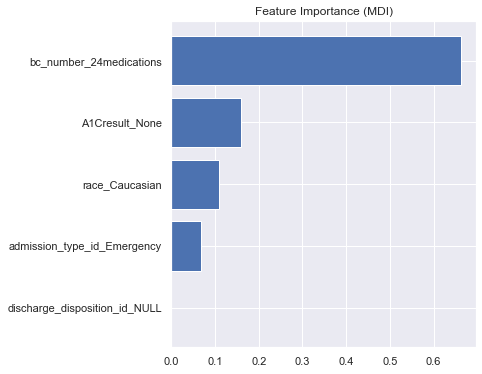

In [539]:
feature_importance = clf.feature_importances_
# print(feature_importance)
# sorted_idx = np.argsort(feature_importance)
# print(sorted_idx)
ten_importance_sorted_idx = np.argsort(feature_importance)[-5:]
# print(ten_importance_sorted_idx)
pos = np.arange(ten_importance_sorted_idx.shape[0]) + .5
# print(pos)
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[ten_importance_sorted_idx], align='center')
plt.yticks(pos, np.array(X_train_2.columns)[ten_importance_sorted_idx])
plt.title('Feature Importance (MDI)')

In [540]:
gb_acc = []
gb_pre = []
gb_rec = []
gb_f1 = []
gb_bal_acc = []

gb_temp_dict = {}


for i, j, k in zip(train_list, test_list, train_list_name):
    clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=41)
    clf.fit(i, SMOTE_y)
    y_predicted = clf.predict(j)
    # accuracy: (tp + tn) / (p + n)
    accuracy = metrics.accuracy_score(y_test_1, y_predicted)
    gb_acc.append(round(accuracy,4))
    # precision tp / (tp + fp)
    precision = metrics.precision_score(y_test_1, y_predicted)
    gb_pre.append(round(precision,4))
    # recall: tp / (tp + fn)
    recall = metrics.recall_score(y_test_1, y_predicted)
    gb_rec.append(round(recall,4))
    # f1: 2 tp / (2 tp + fp + fn)
    f1 = metrics.f1_score(y_test_1, y_predicted)
    gb_f1.append(round(f1,4))
    # balanced accuracy
    bal_acc = metrics.balanced_accuracy_score(y_test_1, y_predicted)
    gb_bal_acc.append(round(bal_acc,4))

    pred = clf.predict_proba(j)[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test_1, pred)
    roc_auc = metrics.auc(fpr, tpr)
    gb_temp_dict.update(
        {k:
            {
                'fpr': fpr,\
                'tpr': tpr,\
                'roc_auc': roc_auc\
            }}
    )

print("gb_acc: ", gb_acc)
print("gb_pre: ", gb_pre)
print("gb_rec: ", gb_rec)
print("gb_f1:  ", gb_f1)
print('gb_bal_acc: ', gb_bal_acc)


gb_acc:  [0.8625, 0.8609, 0.8311]
gb_pre:  [0.892, 0.8918, 0.8901]
gb_rec:  [0.9618, 0.96, 0.9241]
gb_f1:   [0.9256, 0.9246, 0.9068]
gb_bal_acc:  [0.5148, 0.5138, 0.5052]


In [541]:
gb_names = ['GB_1', 'GB_2', 'GB_3']

for name in gb_names:
    # print(name)
    # print(gb_names.index(name))
    # print(gb_temp_dict[train_list_name[gb_names.index(name)]])
    rocDict.update({
        name:{
            'fpr': gb_temp_dict[train_list_name[gb_names.index(name)]]['fpr'],\
            'tpr': gb_temp_dict[train_list_name[gb_names.index(name)]]['tpr'],\
            'roc_auc': gb_temp_dict[train_list_name[gb_names.index(name)]]['roc_auc'],\
        }})

In [542]:
# forward selection
# n_features = [2,3,5,10]
# precision = []
# recall = []
# f1 = []
# bal_acc = []
# gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=41)
# for i in  n_features:
#     print('number of columns =  ', str(i))
#     new_X_train,new_X_test = forward_select(X_train_3, SMOTE_y,gb,i)
#     forward_clf = lr.fit(new_X_train, SMOTE_y)
#     y_pred = forward_clf.predict(new_X_test)
#     clf_test_precision = metrics.precision_score(y_test_1, y_pred).round(4)
#     clf_test_recall = metrics.recall_score(y_test_1, y_pred).round(4)
#     clf_test_F1 = metrics.f1_score(y_test_1, y_pred).round(4)
#     clf_test_bal_acc = metrics.balanced_accuracy_score(y_test_1, y_pred).round(4)
#     precision.append(clf_test_precision)
#     recall.append(clf_test_recall)
#     f1.append(clf_test_F1)
#     bal_acc.append(clf_test_bal_acc)
#     print('balanced accuracy:',clf_test_bal_acc)
#     print('-------------------------')

In [543]:
#n_features = [8,11]
#for i in  n_features:
#    print('number of columns =  ', str(i))
#    new_X_train,new_X_test = forward_select(X_train_3, SMOTE_y,gb,i)
#    forward_clf = lr.fit(new_X_train, SMOTE_y)
#    y_pred = forward_clf.predict(new_X_test)
#    clf_test_precision = metrics.precision_score(y_test_1, y_pred).round(4)
#    clf_test_recall = metrics.recall_score(y_test_1, y_pred).round(4)
#    clf_test_F1 = metrics.f1_score(y_test_1, y_pred).round(4)
#    clf_test_bal_acc = metrics.balanced_accuracy_score(y_test_1, y_pred).round(4)
#    precision.append(clf_test_precision)
#    recall.append(clf_test_recall)
#    f1.append(clf_test_F1)
#    bal_acc.append(clf_test_bal_acc)
#    print('balanced accuracy:',clf_test_bal_acc)
#    print('-------------------------')

In [544]:
#n_features = [9]
#for i in  n_features:
#    print('number of columns =  ', str(i))
#    new_X_train,new_X_test = forward_select(X_train_3, SMOTE_y,gb,i)
#    forward_clf = lr.fit(new_X_train, SMOTE_y)
#    y_pred = forward_clf.predict(new_X_test)
#    clf_test_precision = metrics.precision_score(y_test_1, y_pred).round(4)
#    clf_test_recall = metrics.recall_score(y_test_1, y_pred).round(4)
#    clf_test_F1 = metrics.f1_score(y_test_1, y_pred).round(4)
#    clf_test_bal_acc = metrics.balanced_accuracy_score(y_test_1, y_pred).round(4)
#    precision.append(clf_test_precision)
#    recall.append(clf_test_recall)
#    f1.append(clf_test_F1)
#    bal_acc.append(clf_test_bal_acc)
#    print('balanced accuracy:',clf_test_bal_acc)
#    print('-------------------------')

In [545]:
#best_bal_acc =max(bal_acc)
#print('the best balanced accuracy for naive bayes is: ',best_bal_acc)

In [546]:
#best_index = bal_acc.index(best_bal_acc)
#selected_gb_bal_acc = bal_acc[best_index]
#selected_gb_recall = recall[best_index]
#selected_gb_precision = precision[best_index]
#selected_gb_f1 = f1[best_index]

In [547]:
#selected_gb_precision,selected_gb_recall,selected_gb_f1

In [548]:
gb_forward = [0.8946, 0.9362, 0.915, 0.5267]

# CNN

In [549]:
cnn_acc = []
cnn_pre = []
cnn_rec = []
cnn_f1 = []
cnn_bal_acc = []

In [550]:
input_feature = X_train_3.shape[1]
X_train_3_array = np.array(X_train_3)
X_test_3_array = np.array(X_test_3)

X_train_5 = X_train_3_array.reshape(115704, input_feature,1)
X_test_5 = X_test_3_array.reshape(20354,input_feature,1)
SMOTE_y_array=np.array(SMOTE_y)
y_test_1_array = np.array(y_test_1)

from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import tensorflow.keras as keras

model = keras.Sequential()
 
model.add(Conv1D(32, 3, activation='relu', padding = 'same', input_shape = (input_feature,1)))
model.add(MaxPooling1D())
# model.add(Conv1D(64, 3, activation='relu', padding = 'same'))
# model.add(MaxPooling1D())
# model.add(Conv1D(128, 3, activation='relu', padding = 'same'))
# model.add(MaxPooling1D())
          
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

epoch_num = 5
history = model.fit(X_train_5, SMOTE_y_array, 
              epochs=epoch_num,
              validation_data = (X_test_5, y_test_1_array))

yhat_probs = model.predict(X_test_5, verbose=0)
yhat_classes = model.predict_classes(X_test_5, verbose=0)
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
# accuracy: (tp + tn) / (p + n)
accuracy = metrics.accuracy_score(y_test_1, yhat_classes)
cnn_acc.append(round(accuracy,4))
# precision tp / (tp + fp)
precision = metrics.precision_score(y_test_1, yhat_classes)
cnn_pre.append(round(precision,4))
# recall: tp / (tp + fn)
recall = metrics.recall_score(y_test_1, yhat_classes)
cnn_rec.append(round(recall,4))
# f1: 2 tp / (2 tp + fp + fn)
f1 = metrics.f1_score(y_test_1, yhat_classes)
cnn_f1.append(round(f1,4))
bal_acc = metrics.balanced_accuracy_score(y_test_1, y_predicted)
cnn_bal_acc.append(round(bal_acc,4))

Epoch 1/5
3616/3616 [==============================] - 10s 3ms/step - loss: 0.5222 - accuracy: 0.7426 - val_loss: 0.3971 - val_accuracy: 0.8797
Epoch 2/5
3616/3616 [==============================] - 9s 3ms/step - loss: 0.4863 - accuracy: 0.7681 - val_loss: 0.4560 - val_accuracy: 0.8202
Epoch 3/5
3616/3616 [==============================] - 9s 2ms/step - loss: 0.4823 - accuracy: 0.7698 - val_loss: 0.3958 - val_accuracy: 0.8783
Epoch 4/5
3616/3616 [==============================] - 9s 2ms/step - loss: 0.4781 - accuracy: 0.7726 - val_loss: 0.4065 - val_accuracy: 0.8651
Epoch 5/5
3616/3616 [==============================] - 9s 2ms/step - loss: 0.4761 - accuracy: 0.7743 - val_loss: 0.4070 - val_accuracy: 0.8648


AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [552]:
input_feature = X_train_4.shape[1]
X_train_4_array = np.array(X_train_4)
X_test_4_array = np.array(X_test_4)

X_train_5 = X_train_4_array.reshape(115704, input_feature,1)
X_test_5 = X_test_4_array.reshape(20354,input_feature,1)
SMOTE_y_array=np.array(SMOTE_y)
y_test_1_array = np.array(y_test_1)

from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import tensorflow.keras as keras

model = keras.Sequential()
 
model.add(Conv1D(32, 3, activation='relu', padding = 'same', input_shape = (input_feature,1)))
model.add(MaxPooling1D())
# model.add(Conv1D(64, 3, activation='relu', padding = 'same'))
# model.add(MaxPooling1D())
# model.add(Conv1D(128, 3, activation='relu', padding = 'same'))
# model.add(MaxPooling1D())
          
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

epoch_num = 5
history = model.fit(X_train_5, SMOTE_y_array, 
              epochs=epoch_num,
              validation_data = (X_test_5, y_test_1_array))

yhat_probs = model.predict(X_test_5, verbose=0)
yhat_classes = model.predict_classes(X_test_5, verbose=0)
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
# accuracy: (tp + tn) / (p + n)
accuracy = metrics.accuracy_score(y_test_1, yhat_classes)
cnn_acc.append(round(accuracy,4))
# precision tp / (tp + fp)
precision = metrics.precision_score(y_test_1, yhat_classes)
cnn_pre.append(round(precision,4))
# recall: tp / (tp + fn)
recall = metrics.recall_score(y_test_1, yhat_classes)
cnn_rec.append(round(recall,4))
# f1: 2 tp / (2 tp + fp + fn)
f1 = metrics.f1_score(y_test_1, yhat_classes)
cnn_f1.append(round(f1,4))
bal_acc = metrics.balanced_accuracy_score(y_test_1, y_predicted)
cnn_bal_acc.append(round(bal_acc,4))

Epoch 1/5
3616/3616 [==============================] - 9s 2ms/step - loss: 0.5237 - accuracy: 0.7424 - val_loss: 0.3891 - val_accuracy: 0.8819
Epoch 2/5
3616/3616 [==============================] - 8s 2ms/step - loss: 0.4866 - accuracy: 0.7677 - val_loss: 0.4028 - val_accuracy: 0.8674
Epoch 3/5
3616/3616 [==============================] - 8s 2ms/step - loss: 0.4811 - accuracy: 0.7706 - val_loss: 0.4018 - val_accuracy: 0.8678
Epoch 4/5
3616/3616 [==============================] - 8s 2ms/step - loss: 0.4779 - accuracy: 0.7731 - val_loss: 0.3982 - val_accuracy: 0.8706
Epoch 5/5
3616/3616 [==============================] - 8s 2ms/step - loss: 0.4766 - accuracy: 0.7737 - val_loss: 0.4142 - val_accuracy: 0.8517


AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [553]:
# %matplotlib inline

# import matplotlib.pyplot as plt

# epochs = [i for i in range(epoch_num)]

# plt.plot(epochs, history.history['accuracy'], label = 'Training accuracy')

# plt.plot(epochs, history.history['val_accuracy'], label = 'Validation accuracy')

# plt.legend()
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')

In [588]:
cnn_acc = [0.8468, 0.8797, 0.8156]
cnn_pre = [0.8912, 0.8888, 0.8912]
cnn_rec = [0.9425, 0.9882, 0.9025]
cnn_f1 = [0.9161, 0.9359, 0.8968]
cnn_bal_acc = [0,0,0]

# Voting Ensemble

In [554]:
from sklearn.ensemble import VotingClassifier

# Currently consists of Logistic Regression, Random Forest, Multinominal Naive Bayes

def voting(X_train, y_train, X_test, y_test):
    lr = LogisticRegression(random_state=41,penalty='l1',solver='saga').fit(X_train, y_train)
    rf = RandomForestClassifier(n_estimators = 100,min_samples_leaf=1,
                                 max_depth=1, random_state = 41).fit(X_train, y_train)
    # nb = naive_bayes.MultinomialNB(alpha=1, fit_prior=True, class_prior=None)\
    #                         .fit(X_train, y_train)
    gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, max_depth=1, random_state=41)

    ve = VotingClassifier(
        estimators=[('lr', lr), ('rf', rf), ('gb', gb)],
        voting='soft', weights=[2, 2, 2]
    ).fit(X_train, y_train)

    ve_train_acc = ve.score(X_train, y_train).round(4)
    ve_test_acc = ve.score(X_test, y_test).round(4)
    y_pred = ve.predict(X_test)
    ve_test_precision = metrics.precision_score(y_test, y_pred).round(4)
    ve_test_recall = metrics.recall_score(y_test, y_pred).round(4)
    ve_test_F1 = metrics.f1_score(y_test, y_pred).round(4)
    ve_test_bal_acc = metrics.balanced_accuracy_score(y_test, y_pred).round(4)
    print('training accuracy: ', ve_train_acc)
 
    pred = ve.predict_proba(X_test)[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, pred)
    roc_auc = metrics.auc(fpr, tpr)
    # print("roc: {}".format(roc_auc))
    # print("fpr: {}".format(fpr))

    scores = {'acc': ve_test_acc,\
                'pre': ve_test_precision,\
                'rec': ve_test_recall,\
                'F1': ve_test_F1,\
                'bal_acc': ve_test_bal_acc,\
                'fpr': fpr,\
                'tpr': tpr,\
                'roc_auc': roc_auc}

    return scores


# normalize only
ve_3_scores = voting(X_train_3, SMOTE_y, X_test_3, y_test_1)
print('test scores:', ve_3_scores['acc'])
rocDict.update({'VE_1': \
                {'fpr': ve_3_scores['fpr'],\
                    'tpr': ve_3_scores['tpr'],\
                    'roc_auc': ve_3_scores['roc_auc']}\
                })

# normalize+remove low-variance features
ve_4_scores = voting(X_train_4, SMOTE_y, X_test_4, y_test_1)
print('test scores:', ve_4_scores['acc'])
rocDict.update({'VE_2': \
                {'fpr': ve_4_scores['fpr'],\
                    'tpr': ve_4_scores['tpr'],\
                    'roc_auc': ve_4_scores['roc_auc']}\
                })

# pca after normalize, then nomolized to fit Multinomial NB
# ve_pca_scores = voting(MinMaxScaler().fit_transform(X_train_pca), SMOTE_y, MinMaxScaler().fit_transform(X_test_pca), y_test_1)
ve_pca_scores = voting(X_train_pca, SMOTE_y, X_test_pca, y_test_1)
print('test scores:', ve_pca_scores['acc'])
rocDict.update({'VE_3': \
                {'fpr': ve_4_scores['fpr'],\
                    'tpr': ve_4_scores['tpr'],\
                    'roc_auc': ve_4_scores['roc_auc']}\
                })

ve_acc = []
ve_pre = []
ve_rec = []
ve_f1 = []
ve_bal_acc = []

score_name = ['acc', 'pre', 'rec', 'F1', 'bal_acc']
ve_scores = [ve_acc, ve_pre, ve_rec, ve_f1, ve_bal_acc]

for scoreRow in ve_scores:
    scoreRow.append(ve_3_scores.get(score_name[ve_scores.index(scoreRow)]))
    scoreRow.append(ve_4_scores.get(score_name[ve_scores.index(scoreRow)]))
    scoreRow.append(ve_pca_scores.get(score_name[ve_scores.index(scoreRow)]))
    print(scoreRow)

training accuracy:  0.7559
test scores: 0.8866
training accuracy:  0.7558
test scores: 0.8865
training accuracy:  0.6468
test scores: 0.8785
[0.8866, 0.8865, 0.8785]
[0.8897, 0.8897, 0.8898]
[0.9959, 0.9958, 0.9854]
[0.9398, 0.9398, 0.9351]
[0.5037, 0.5037, 0.5042]


# XGBoosting

In [555]:
#import libraries
import pandas as pd
import xgboost as xgb
import numpy as np

#create xgboost matrices
Train = xgb.DMatrix(X_train_3, label = SMOTE_y)
Test = xgb.DMatrix(X_test_3, label = y_test_1)

#set the parameters
parameters1 = {'learning_rate': 0.5,
               'max_depth': 5,
               'colsample_bytree': 1,
               'subsample': 1,
               'min_child_weight': 2,
               'gamma': 1, 
               'random_state': 41,
               'eval_metric': "auc",
               'objective': "binary:logistic"}

#run XGBoost
model1 = xgb.train(params = parameters1,
                   dtrain = Train,
                   num_boost_round = 200,
                   evals = [(Test, "Yes")],
                   verbose_eval = 30)


[0]	Yes-auc:0.54883
[30]	Yes-auc:0.57818
[60]	Yes-auc:0.57432
[90]	Yes-auc:0.57265
[120]	Yes-auc:0.57795
[150]	Yes-auc:0.57571
[180]	Yes-auc:0.57562
[199]	Yes-auc:0.57566


In [556]:
#PRedictions
predictions1 = model1.predict(Test)
predictions1 = np.where(predictions1 > 0.5, 1, 0)

#Confusion MAtrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix1 = confusion_matrix(y_test_1, predictions1)
print(confusion_matrix1)
report1 = classification_report(y_test_1, predictions1)
print(report1)

[[  286  1974]
 [ 1532 16562]]
              precision    recall  f1-score   support

           0       0.16      0.13      0.14      2260
           1       0.89      0.92      0.90     18094

    accuracy                           0.83     20354
   macro avg       0.53      0.52      0.52     20354
weighted avg       0.81      0.83      0.82     20354



In [557]:
#feature_coloumns
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
train_test_new.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in train_test_new.columns.values]
feature_columns = list(train_test_new.columns.values)
feature_columns

['time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_inpatient',
 'number_diagnoses',
 'number_24medications',
 'number_change_24medications',
 'race_AfricanAmerican',
 'race_Asian',
 'race_Caucasian',
 'race_Hispanic',
 'race_Other',
 'gender_Female',
 'gender_Male',
 'gender_Unknown/Invalid',
 'age__0-10)',
 'age__10-20)',
 'age__20-30)',
 'age__30-40)',
 'age__40-50)',
 'age__50-60)',
 'age__60-70)',
 'age__70-80)',
 'age__80-90)',
 'age__90-100)',
 'admission_type_id_Elective',
 'admission_type_id_Emergency',
 'admission_type_id_NULL',
 'admission_type_id_Newborn',
 'admission_type_id_Not Available',
 'admission_type_id_Not Mapped',
 'admission_type_id_Trauma Center',
 'admission_type_id_Urgent',
 'discharge_disposition_id_AMA',
 'discharge_disposition_id_Expired',
 'discharge_disposition_id_HHC',
 'discharge_disposition_id_NULL',
 'discharge_disposition_id_Not mapped',
 'discharge_disposition_id_Routine',
 'discharge_dis

In [558]:
#create xgboost matrices part 2
Train = xgb.DMatrix(X_train_3, label = SMOTE_y, feature_names = feature_columns)
Test = xgb.DMatrix(X_test_3, label = y_test_1, feature_names = feature_columns)

In [559]:
#set the parameters part 2
parameters2 = {'learning_rate': 0.05,
               'max_depth': 2,
               'colsample_bytree': 0.5,
               'subsample': 1,
               'min_child_weight': 1,
               'gamma': 0, 
               'random_state': 41,
               'eval_metric': "auc",
               'objective': "binary:logistic"}

#run XGBoost
model2 = xgb.train(params = parameters2,
                   dtrain = Train,
                   num_boost_round = 200,
                   evals = [(Test, "Yes")],
                   verbose_eval = 50)

[0]	Yes-auc:0.53737
[50]	Yes-auc:0.54378
[100]	Yes-auc:0.55397
[150]	Yes-auc:0.55771
[199]	Yes-auc:0.55936


In [560]:
#Predictions part 2
predictions2 = model2.predict(Test)
predictions2 = np.where(predictions2 > 0.5, 1, 0)

#Confusion Matrix
confusion_matrix2 = confusion_matrix(y_test_1, predictions2)
print(confusion_matrix2)
report2 = classification_report(y_test_1, predictions2)
print(report2)

[[  197  2063]
 [  971 17123]]
              precision    recall  f1-score   support

           0       0.17      0.09      0.11      2260
           1       0.89      0.95      0.92     18094

    accuracy                           0.85     20354
   macro avg       0.53      0.52      0.52     20354
weighted avg       0.81      0.85      0.83     20354



In [561]:
#setting the cross validation parameters


# from sklearn.model_selection import KFold
# tune_control = KFold(n_splits = 5,
#                      shuffle = True,
#                      random_state = 41).split(X = X_train_3,
#                                                 y = SMOTE_y)

# #set parameter tuning
# #set the parameters part 2
# tune_grid = {'learning_rate': [0.05, 0.3],
#                'max_depth': range(2, 9, 2),
#                'colsample_bytree': [0.5, 1],
#                'subsample': [1],
#                'min_child_weight': [1],
#                'gamma': [0], 
#                'random_state': [41],
#                'n_estimators': range(200, 2000, 200),
#                'booster': ["gbtree"]}               

# from xgboost import XGBClassifier
# classifier = XGBClassifier(objective = "binary:logistic")

# #Cross Validation Assembly
# from sklearn.model_selection import GridSearchCV
# grid_search = GridSearchCV(estimator = classifier,
#                            param_grid = tune_grid,
#                             scoring = "roc_auc",
#                             n_jobs = 6,
#                             cv = tune_control,
#                             verbose = 5)

# #Setting evaluation parameters
# evaluation_parameters = {"early_stopping_rounds": 100,
#                          "eval_metric": "auc",
#                          "eval_set": [(X_test_3, y_test_1)]}

# #Hyperparameter tuning and cross validation
# tune_model = grid_search.fit(X = X_train_3,
#                              y = SMOTE_y,
#                              **evaluation_parameters)
# grid_search.best_params_, grid_search.best_score_




# #output:({'booster': 'gbtree',
#   'colsample_bytree': 1,
#   'gamma': 0,
#   'learning_rate': 0.05,
#   'max_depth': 8,
#   'min_child_weight': 1,
#   'n_estimators': 200,
#   'random_state': 41,
#   'subsample': 1},
#  0.8774396058301308)

In [562]:
#setting the cross validation parameters


# from sklearn.model_selection import KFold
# tune_control = KFold(n_splits = 5,
#                      shuffle = True,
#                      random_state = 41).split(X = X_train_3,
#                                                 y = SMOTE_y)

# #set parameter tuning part 2
# tune_grid2 = {'learning_rate': [0.05],
#                'max_depth': [8],
#                'colsample_bytree': [1],
#                'subsample': [0.9, 1],
#                'min_child_weight': range(1,5,1),
#                'gamma': [0, 0.1], 
#                'random_state': [41],
#                'n_estimators': range(200, 2000, 200),
#                'booster': ["gbtree"]}         

# #Cross Validation Assembly
# from sklearn.model_selection import GridSearchCV
# grid_search2 = GridSearchCV(estimator = classifier,
#                            param_grid = tune_grid2,
#                             scoring = "roc_auc",
#                             n_jobs = 6,
#                             cv = tune_control,
#                             verbose = 5)


# #Hyperparameter tuning and cross validation
# tune_model2 = grid_search2.fit(X = X_train_3,
#                              y = SMOTE_y,
#                              **evaluation_parameters)
# grid_search2.best_params_, grid_search2.best_score_




# output: ({'booster': 'gbtree',
#   'colsample_bytree': 1,
#   'gamma': 0,
#   'learning_rate': 0.05,
#   'max_depth': 8,
#   'min_child_weight': 3,
#   'n_estimators': 400,
#   'random_state': 41,
#   'subsample': 0.9},
#  0.8807858246028522)

In [563]:
parameters3 = {'learning_rate': 0.05,
               'max_depth': 8,
               'colsample_bytree': 0.5,
               'subsample': 0.9,
               'min_child_weight': 3,
               'gamma': 0, 
               'random_state': 41,
               'eval_metric': "auc",
               'objective': "binary:logistic"}

#run XGBoost part 3
model3 = xgb.train(params = parameters3,
                   dtrain = Train,
                   num_boost_round = 800,
                   evals = [(Test, "Yes")],
                   verbose_eval = 50)


#Predictions part 3
predictions3 = model3.predict(Test)
predictions3 = np.where(predictions3 > 0.5, 1, 0)

#Confusion Matrix
confusion_matrix3 = confusion_matrix(y_test_1, predictions3)
print(confusion_matrix3)
report3 = classification_report(y_test_1, predictions3)
print(report3)


[0]	Yes-auc:0.55928
[50]	Yes-auc:0.57512
[100]	Yes-auc:0.58040
[150]	Yes-auc:0.58228
[200]	Yes-auc:0.58400
[250]	Yes-auc:0.58499
[300]	Yes-auc:0.58277
[350]	Yes-auc:0.58180
[400]	Yes-auc:0.58047
[450]	Yes-auc:0.58081
[500]	Yes-auc:0.58191
[550]	Yes-auc:0.58327
[600]	Yes-auc:0.58313
[650]	Yes-auc:0.58480
[700]	Yes-auc:0.58450
[750]	Yes-auc:0.58490
[799]	Yes-auc:0.58535
[[  174  2086]
 [  989 17105]]
              precision    recall  f1-score   support

           0       0.15      0.08      0.10      2260
           1       0.89      0.95      0.92     18094

    accuracy                           0.85     20354
   macro avg       0.52      0.51      0.51     20354
weighted avg       0.81      0.85      0.83     20354



<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

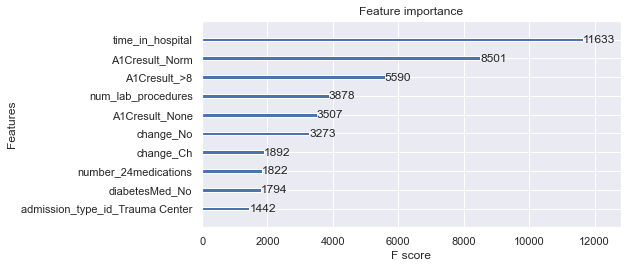

In [564]:
#plot importances
xgb.plot_importance(model3, max_num_features = 10)

In [565]:
import shap
explainer = shap.TreeExplainer(model3)
shap_values = explainer.shap_values(X_test_3)
#shap plotting
shap.summary_plot(shap_values,
                  X_test_3,
                  feature_names = feature_columns,
                  max_display = 10)

KeyboardInterrupt: 

In [566]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test_1, predictions3)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test_1, predictions3)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test_1, predictions3)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_1,predictions3)
print('F1 score: %f' % f1)

Accuracy: 0.848924
Precision: 0.891303
Recall: 0.945341
F1 score: 0.917527


In [567]:
#For Normalised + remove sparse features
#create xgboost matrices
Train2 = xgb.DMatrix(X_train_4, label = SMOTE_y)
Test2 = xgb.DMatrix(X_test_4, label = y_test_1)

#set the parameters
parameters4 = {'learning_rate': 0.05,
               'max_depth': 8,
               'colsample_bytree': 0.5,
               'subsample': 0.9,
               'min_child_weight': 3,
               'gamma': 0, 
               'random_state': 41,
               'eval_metric': "auc",
               'objective': "binary:logistic"}

#run XGBoost
model4 = xgb.train(params = parameters4,
                   dtrain = Train2,
                   num_boost_round = 200,
                   evals = [(Test2, "Yes")],
                   verbose_eval = 30)

[0]	Yes-auc:0.54030
[30]	Yes-auc:0.56153
[60]	Yes-auc:0.56611
[90]	Yes-auc:0.57096
[120]	Yes-auc:0.57259
[150]	Yes-auc:0.57342
[180]	Yes-auc:0.57654
[199]	Yes-auc:0.57707


In [568]:
#PRedictions
predictions4 = model4.predict(Test2)
predictions4 = np.where(predictions4 > 0.5, 1, 0)

#Confusion MAtrix
confusion_matrix4 = confusion_matrix(y_test_1, predictions4)
print(confusion_matrix4)
report4 = classification_report(y_test_1, predictions4)
print(report4)

[[  172  2088]
 [ 1007 17087]]
              precision    recall  f1-score   support

           0       0.15      0.08      0.10      2260
           1       0.89      0.94      0.92     18094

    accuracy                           0.85     20354
   macro avg       0.52      0.51      0.51     20354
weighted avg       0.81      0.85      0.83     20354



In [569]:

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test_1, predictions4)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test_1, predictions4)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test_1, predictions4)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_1,predictions4)
print('F1 score: %f' % f1)

Accuracy: 0.847941
Precision: 0.891108
Recall: 0.944346
F1 score: 0.916955


In [570]:
#For Normalised+PCA
X_test_pca2 = np.asmatrix(X_test_pca)
X_train_pca2 = np.asmatrix(X_train_pca)
#create xgboost matrices
Train3 = xgb.DMatrix(X_train_pca2, label = SMOTE_y)
Test3 = xgb.DMatrix(X_test_pca2, label = y_test_1)



In [571]:

#set the parameters
parameters5 = {'learning_rate': 0.05,
               'max_depth': 8,
               'colsample_bytree': 0.5,
               'subsample': 0.9,
               'min_child_weight': 3,
               'gamma': 0, 
               'random_state': 41,
               'eval_metric': "auc",
               'objective': "binary:logistic"}

#run XGBoost
model5 = xgb.train(params = parameters5,
                   dtrain = Train3,
                   num_boost_round = 200,
                   evals = [(Test3, "Yes")],
                   verbose_eval = 30)

[0]	Yes-auc:0.51874
[30]	Yes-auc:0.55362
[60]	Yes-auc:0.56359
[90]	Yes-auc:0.56931
[120]	Yes-auc:0.57351
[150]	Yes-auc:0.57658
[180]	Yes-auc:0.57817
[199]	Yes-auc:0.57921


In [572]:
#PRedictions
predictions5 = model5.predict(Test3)
predictions5 = np.where(predictions5 > 0.5, 1, 0)

#Confusion MAtrix
confusion_matrix5 = confusion_matrix(y_test_1, predictions5)
print(confusion_matrix5)
report5 = classification_report(y_test_1, predictions5)
print(report5)

[[  274  1986]
 [ 1646 16448]]
              precision    recall  f1-score   support

           0       0.14      0.12      0.13      2260
           1       0.89      0.91      0.90     18094

    accuracy                           0.82     20354
   macro avg       0.52      0.52      0.52     20354
weighted avg       0.81      0.82      0.82     20354



In [573]:

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test_1, predictions5)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test_1, predictions5)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test_1, predictions5)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_1,predictions5)
print('F1 score: %f' % f1)

Accuracy: 0.821558
Precision: 0.892264
Recall: 0.909031
F1 score: 0.900569


In [574]:
xgb_acc = [0.848790,0.850952, 0.823556]
xgb_pre = [0.891033,0.890097, 0.890782]
xgb_rec = [0.945308,0.949358, 0.913258]
xgb_f1 = [0.917368,0.918773, 0.901880]

# Evaluation

In [581]:
# Forward selection results
forward_precision = [nb_forward[0],logit_forward[0],rf_forward[0],'-','-',gb_forward[0],'-','-']
forward_recall = [nb_forward[1],logit_forward[1],rf_forward[1],'-','-',gb_forward[1],'-','-']
forward_f1 = [nb_forward[2],logit_forward[2],rf_forward[2],'-','-',gb_forward[2],'-','-']
forward_bal_acc = [nb_forward[3],logit_forward[3],rf_forward[3],'-','-',gb_forward[3],'-','-']

In [582]:
# Stepwise selection results
stepwise_precision = [nb_stepwise[0],logit_stepwise[0],'-','-','-',gb_stepwise[0],'-','-']
stepwise_recall = [nb_stepwise[1],logit_stepwise[1],'-','-','-',gb_stepwise[1],'-','-']
stepwise_f1 = [nb_stepwise[2],logit_stepwise[2],'-','-','-',gb_stepwise[2],'-','-']
stepwise_bal_acc = [nb_stepwise[3],logit_stepwise[3],'-','-','-',gb_stepwise[3],'-','-']

In [583]:
test_acc={'Multinomial Naive Bayes': nb_acc,
            'Logistic Regression': lr_acc,
            'Random Forest': rf_acc,
            'ANN': ann_acc,
            'CNN': cnn_acc,
            'GB': gb_acc,
            'Voting': ve_acc,
            'XGB':xgb_acc}
test_acc_table  = pd.DataFrame(test_acc).T
test_acc_table.columns = ['Normalised only','Normalised + remove sparse features','Normalised+PCA']
print("Accuracy")
display(test_acc_table)

Accuracy


,Normalised only,Normalised + remove sparse features,Normalised+PCA
Multinomial Naive Bayes,0.73840,0.742000,0.889000
Logistic Regression,0.84810,0.849800,0.773900
Random Forest,0.84720,0.846300,0.821300
ANN,0.86260,0.844000,0.845600
CNN,0.84680,0.879700,0.815600
GB,0.86250,0.860900,0.831100
Voting,0.88660,0.886500,0.878500
XGB,0.84879,0.850952,0.823556


In [584]:
test_pre={'Multinomial Naive Bayes': nb_pre,
            'Logistic Regression': lr_pre,
            'Random Forest': rf_pre,
            'ANN': ann_pre,
            'CNN': cnn_pre,
            'GB': gb_pre,
            'Voting': ve_pre,
            'XGB':xgb_pre}
test_pre_table  = pd.DataFrame(test_pre).T
test_pre_table.columns = ['Normalised only','Normalised + remove sparse features','Normalised+PCA']
test_pre_table['Normalised + forward selection'] = forward_precision
test_pre_table['Normalised + stepwise selection'] = stepwise_precision
print("Precision")
display(test_pre_table)

Precision


,Normalised only,Normalised + remove sparse features,Normalised+PCA,Normalised + forward selection,Normalised + stepwise selection
Multinomial Naive Bayes,0.895300,0.893800,0.889000,0.8979,0.8945
Logistic Regression,0.892400,0.892700,0.894600,0.8631,0.8922
Random Forest,0.891200,0.890600,0.892200,0.8918,-
ANN,0.962100,0.937900,0.941900,-,-
CNN,0.891200,0.888800,0.891200,-,-
GB,0.892000,0.891800,0.890100,0.8946,0.8921
Voting,0.889700,0.889700,0.889800,-,-
XGB,0.891033,0.890097,0.890782,-,-


In [589]:
test_rec={'Multinomial Naive Bayes': nb_rec,
            'Logistic Regression': lr_rec,
            'Random Forest': rf_rec,
            'ANN': ann_rec,
            'CNN': cnn_rec,
            'GB': gb_rec,
            'Voting': ve_rec,
            'XGB':xgb_rec}
test_rec_table  = pd.DataFrame(test_rec).T
test_rec_table.columns = ['Normalised only','Normalised + remove sparse features','Normalised+PCA']
test_rec_table['Normalised + forward selection'] = forward_recall
test_rec_table['Normalised + stepwise selection'] = stepwise_recall
print("Recall")
display(test_rec_table)

Recall


,Normalised only,Normalised + remove sparse features,Normalised+PCA,Normalised + forward selection,Normalised + stepwise selection
Multinomial Naive Bayes,0.799200,0.805400,1.000000,0.8529,0.9173
Logistic Regression,0.942800,0.944600,0.845200,0.9538,0.9495
Random Forest,0.943200,0.942900,0.908800,0.9043,-
ANN,0.891800,0.892100,0.890700,-,-
CNN,0.942500,0.988200,0.902500,-,-
GB,0.961800,0.960000,0.924100,0.9362,0.9592
Voting,0.995900,0.995800,0.985400,-,-
XGB,0.945308,0.949358,0.913258,-,-


In [590]:
test_f1={'Multinomial Naive Bayes': nb_f1,
            'Logistic Regression': lr_f1,
            'Random Forest': rf_f1,
            'ANN': ann_f1,
            'CNN': cnn_f1,
            'GB': gb_f1,
            'Voting': ve_f1,
            'XGB':xgb_f1}
test_f1_table  = pd.DataFrame(test_f1).T
test_f1_table.columns = ['Normalised only','Normalised + remove sparse features','Normalised+PCA']
test_f1_table['Normalised + forward selection'] = forward_f1
test_f1_table['Normalised + stepwise selection'] = stepwise_f1
print("F1")
display(test_f1_table)

F1


,Normalised only,Normalised + remove sparse features,Normalised+PCA,Normalised + forward selection,Normalised + stepwise selection
Multinomial Naive Bayes,0.844500,0.847300,0.94120,0.8748,0.9058
Logistic Regression,0.916900,0.917900,0.86920,0.9271,0.92
Random Forest,0.916500,0.916000,0.90040,0.898,-
ANN,0.925600,0.914500,0.91560,-,-
CNN,0.916100,0.935900,0.89680,-,-
GB,0.925600,0.924600,0.90680,0.915,0.9244
Voting,0.939800,0.939800,0.93510,-,-
XGB,0.917368,0.918773,0.90188,-,-


In [591]:
test_bal_acc={'Multinomial Naive Bayes': nb_bal_acc,
            'Logistic Regression': lr_bal_acc,
            'Random Forest': rf_bal_acc,
            'ANN': ann_bal_acc,
            'CNN': cnn_bal_acc,
            'GB': gb_bal_acc,
            'Voting': ve_bal_acc,
            'XGB':[0,0,0]}
test_bal_acc_table  = pd.DataFrame(test_bal_acc).T
test_bal_acc_table.columns = ['Normalised only','Normalised + remove sparse features','Normalised+PCA']
test_bal_acc_table['Normalised + forward selection'] = forward_bal_acc
test_bal_acc_table['Normalised + stepwise selection'] = stepwise_bal_acc
print("balanced accuracy")
display(test_bal_acc_table)

balanced accuracy


,Normalised only,Normalised + remove sparse features,Normalised+PCA,Normalised + forward selection,Normalised + stepwise selection
Multinomial Naive Bayes,0.5253,0.5197,0.5000,0.5382,0.5257
Logistic Regression,0.5165,0.5176,0.5239,0.5125,0.5157
Random Forest,0.5108,0.5080,0.5148,0.5128,-
ANN,0.5157,0.5157,0.5157,-,-
CNN,0.0000,0.0000,0.0000,-,-
GB,0.5148,0.5138,0.5052,0.5267,0.5152
Voting,0.5037,0.5037,0.5042,-,-
XGB,0.0000,0.0000,0.0000,-,-


## ROC-AUC

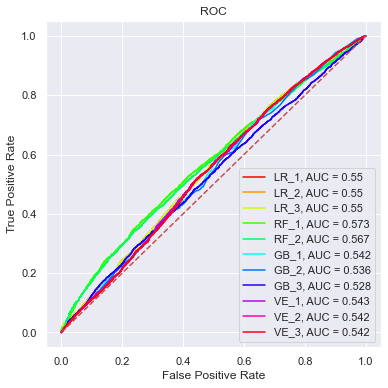

In [592]:
cmap = plt.cm.get_cmap('hsv', len(rocDict))

keyList = list(rocDict.keys())
plt.figure(figsize=(6, 6))
plt.title('ROC')
for key, value in rocDict.items():
# for each in [nb_3_scores, nb_4_scores, nb_pca_scores]:
    plt.plot(value['fpr'], value['tpr'],\
            color=cmap(keyList.index(key)),\
            label='{}, AUC = {}'.format(key, value['roc_auc'].round(3)))
    
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()